
### Exploratory Data Analysis (EDA)

This project is focused on exploratory data analysis, aka "EDA". EDA is an essential part of the data science analysis pipeline. Failure to perform EDA before modeling is almost guaranteed to lead to bad models and faulty conclusions.

#### Package imports

In [1]:
import numpy as np
import scipy.stats as stats
import csv
import pandas as pd
import pprint as pp
import matplotlib.pyplot as plt 
# this line tells jupyter notebook to put the plots in the notebook rather than saving them to file.
%matplotlib inline

# this line makes plots prettier on mac retina screens. If you don't have one it shouldn't do anything.
%config InlineBackend.figure_format = 'retina'


## 1. Load the `sat_scores.csv` dataset and describe it


### 1.1 Load the file with the `csv` module and put it in a Python dictionary

The dictionary format for data will be the column names as key, and the data under each column as the values.

In [2]:
with open('sat_scores.csv', mode='r') as f:
    sat = {}
    reader = csv.DictReader(f)
    header = next(reader)
    for row in reader:
        for col, val in row.iteritems():
            sat.setdefault(col,[]).append(val)  
pp.pprint (sat)


{'Math': ['513',
          '515',
          '505',
          '516',
          '499',
          '499',
          '506',
          '500',
          '501',
          '499',
          '510',
          '499',
          '489',
          '501',
          '488',
          '474',
          '526',
          '499',
          '527',
          '499',
          '515',
          '510',
          '517',
          '525',
          '515',
          '542',
          '439',
          '539',
          '512',
          '542',
          '553',
          '542',
          '589',
          '550',
          '545',
          '572',
          '589',
          '580',
          '554',
          '568',
          '561',
          '577',
          '562',
          '596',
          '550',
          '570',
          '603',
          '582',
          '599',
          '551',
          '514'],
 'Rate': ['81',
          '79',
          '77',
          '72',
          '71',
          '71',
          '69',
          '69',
    

### Make a pandas DataFrame object with the SAT dictionary, and another with the pandas `.read_csv()` function

In [3]:
pand_sat = pd.DataFrame(sat)
pand_sat.dtypes

Math      object
Rate      object
State     object
Verbal    object
dtype: object

In [4]:
pand_sat1 = pd.read_csv('sat_scores.csv')
pand_sat1.dtypes

State     object
Rate       int64
Verbal     int64
Math       int64
dtype: object

If you did not convert the string column values to float in your dictionary, the columns in the DataFrame are of type `object` (which are string values, essentially). 

#### Look at the first ten rows of the DataFrame: what does our data describe?

In [5]:
pand_sat1.head(10)

,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516
5,RI,71,501,499
6,PA,71,500,499
7,VT,69,511,506
8,ME,69,506,500
9,VA,68,510,501


 Create a "data dictionary" based on the data

A data dictionary is an object that describes your data. This should contain the name of each variable (column), the type of the variable, your description of what the variable is, and the shape (rows and columns) of the entire dataset.

In [ ]:
datadict = pand_sat1.info()
datadict

#### Plot the data using seaborn
#### Using seaborn's `distplot`, plot the distributions for each of `Rate`, `Math`, and `Verbal`

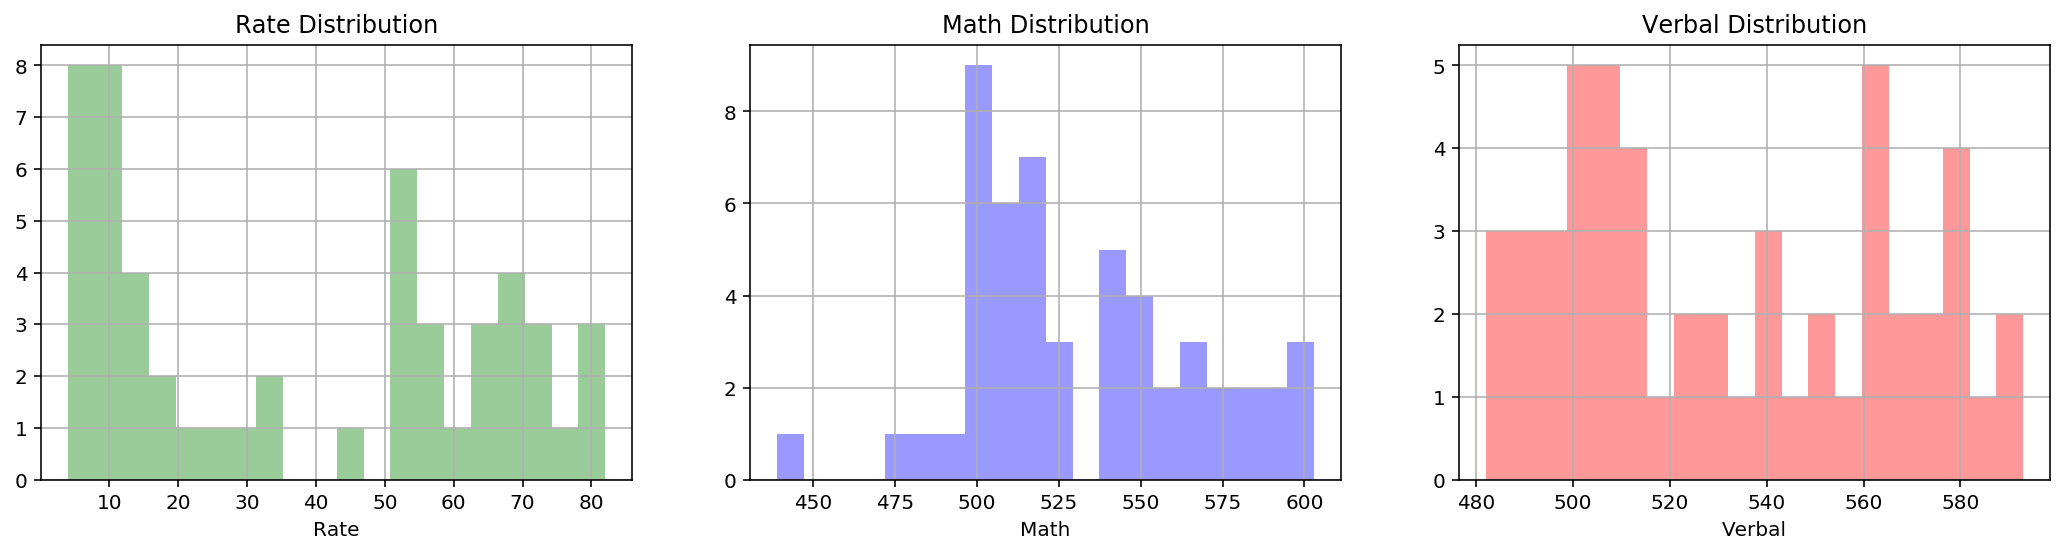

In [7]:
import seaborn as sns
plt.figure(figsize=(18,4))
plt.subplot(1,3,1)
plt.grid()
plt.title('Rate Distribution')
_=sns.distplot(pand_sat1['Rate'], kde=False,bins=20,color='Green')
plt.subplot(1,3,2)
plt.grid()
plt.title('Math Distribution')
_=sns.distplot(pand_sat1["Math"],kde=False,bins=20,color = 'Blue')
plt.subplot(1,3,3)
plt.grid()
plt.title('Verbal Distribution')
_=sns.distplot(pand_sat1["Verbal"],kde=False,bins=20,color = 'red')

 #### Using seaborn's `pairplot`, show the joint distributions for each of `Rate`, `Math`, and `Verbal`

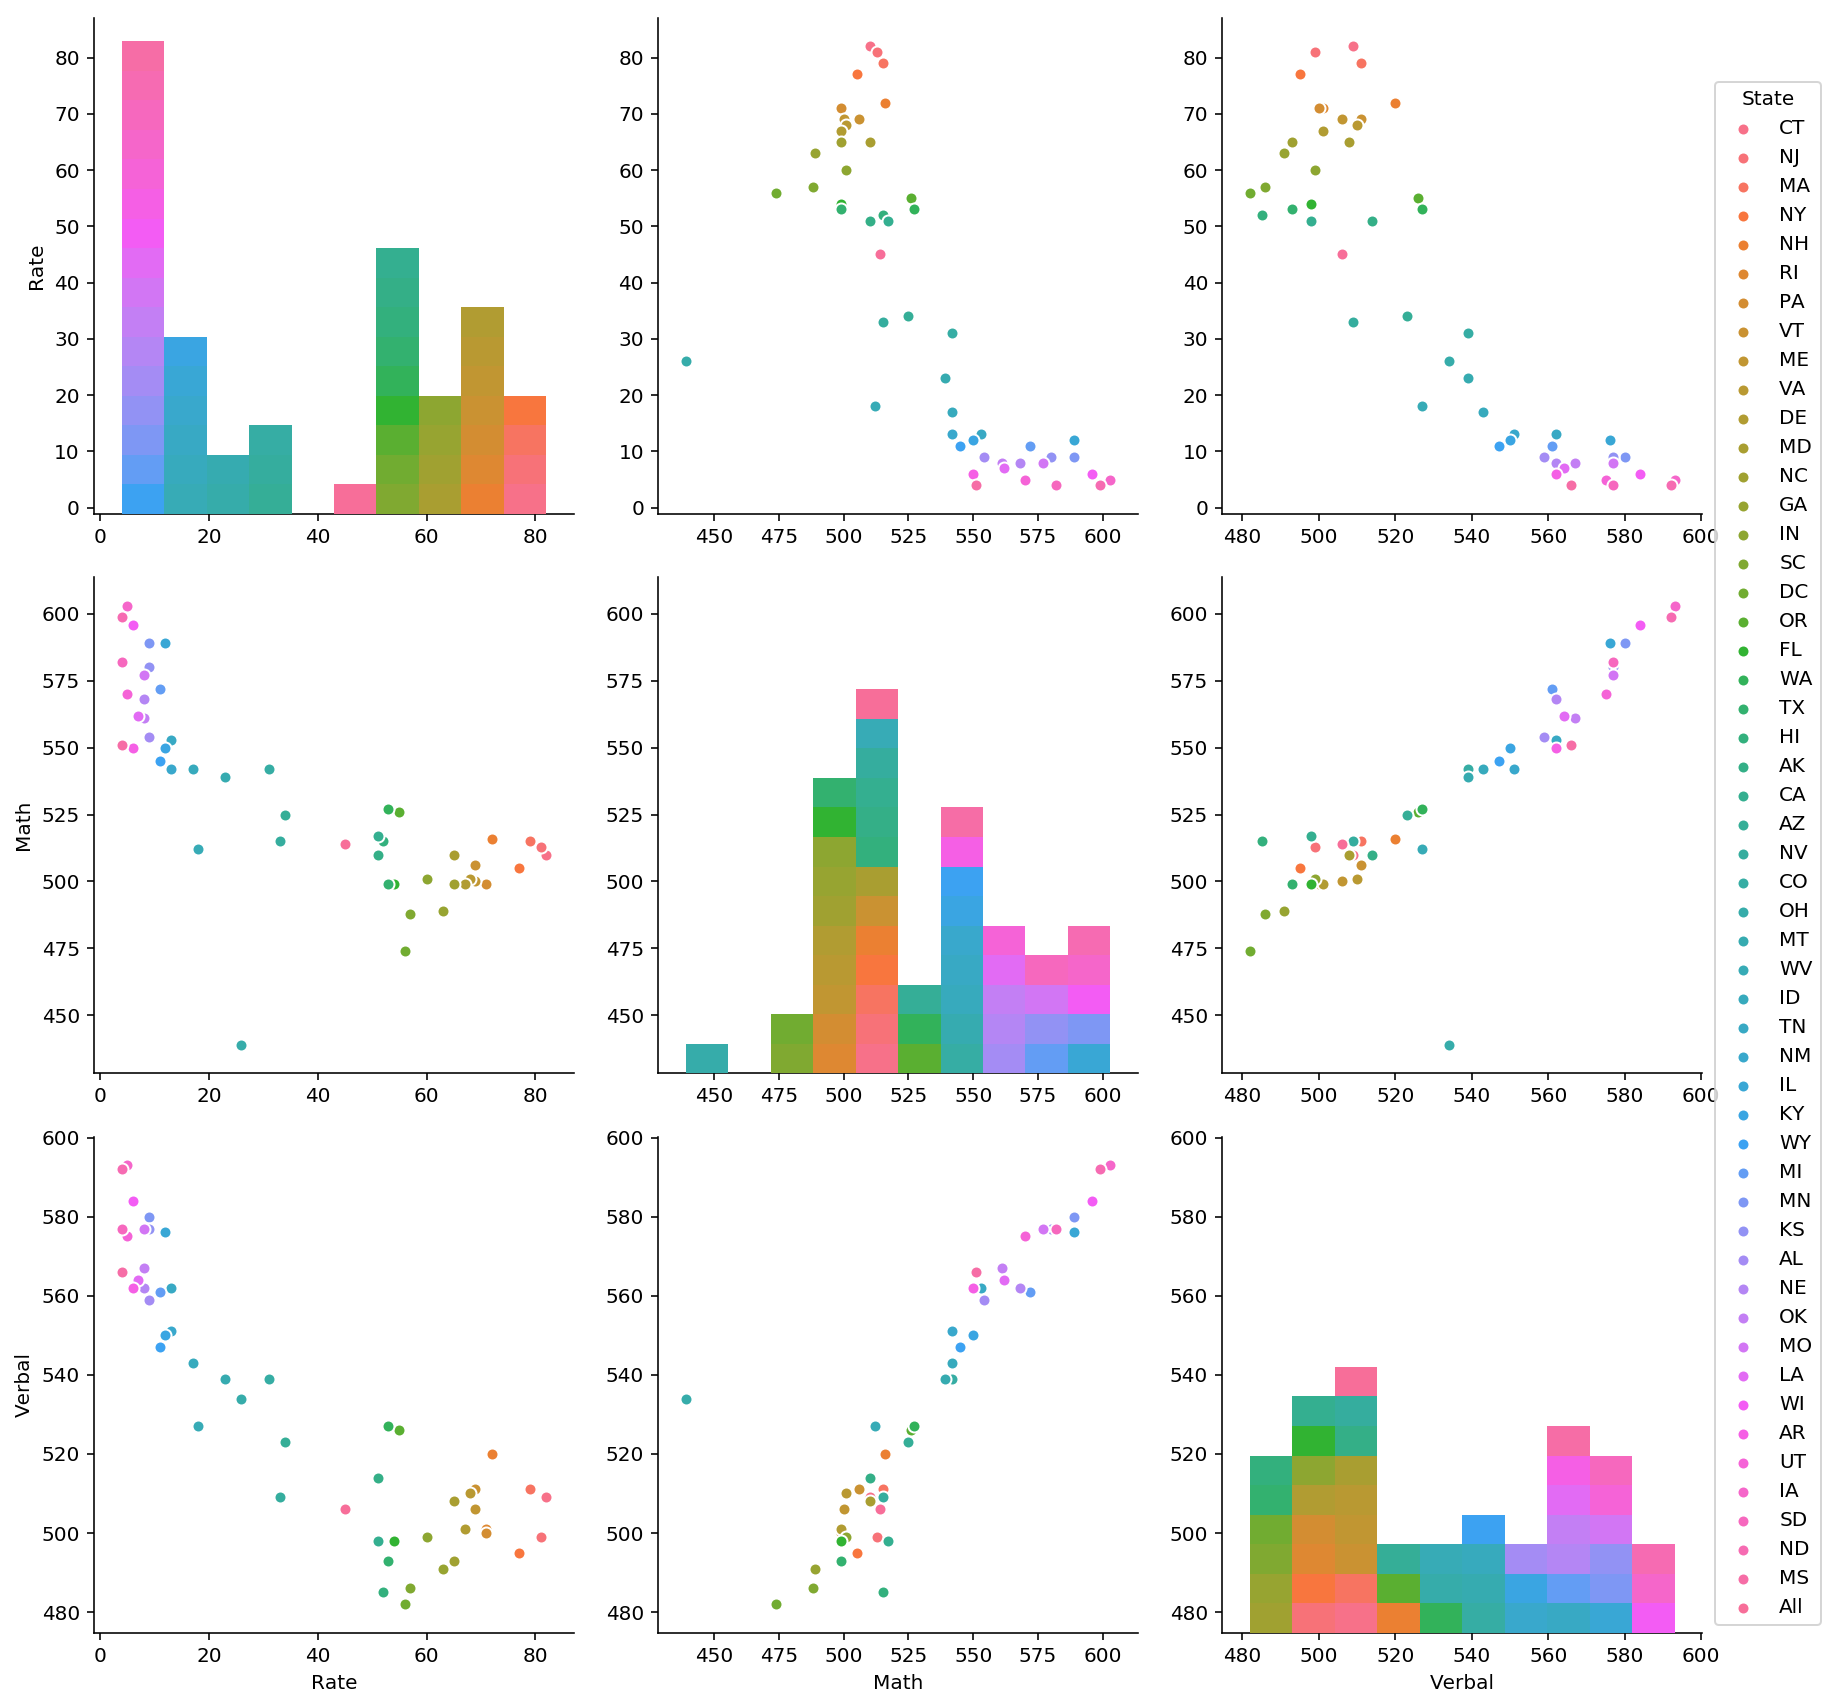

In [8]:
_=sns.pairplot(pand_sat1, vars = ['Rate','Math','Verbal'], hue ='State', size= 4)



###### Verbal and math are positively correlated.
###### The "Rate" is negatively correlated to Math and verbal
###### In a high rate, high math scores and high verbal scores are absent



##  Plot the data using built-in pandas functions.

---

http://pandas.pydata.org/pandas-docs/stable/visualization.html

### Plot a stacked histogram with `Verbal` and `Math` using pandas

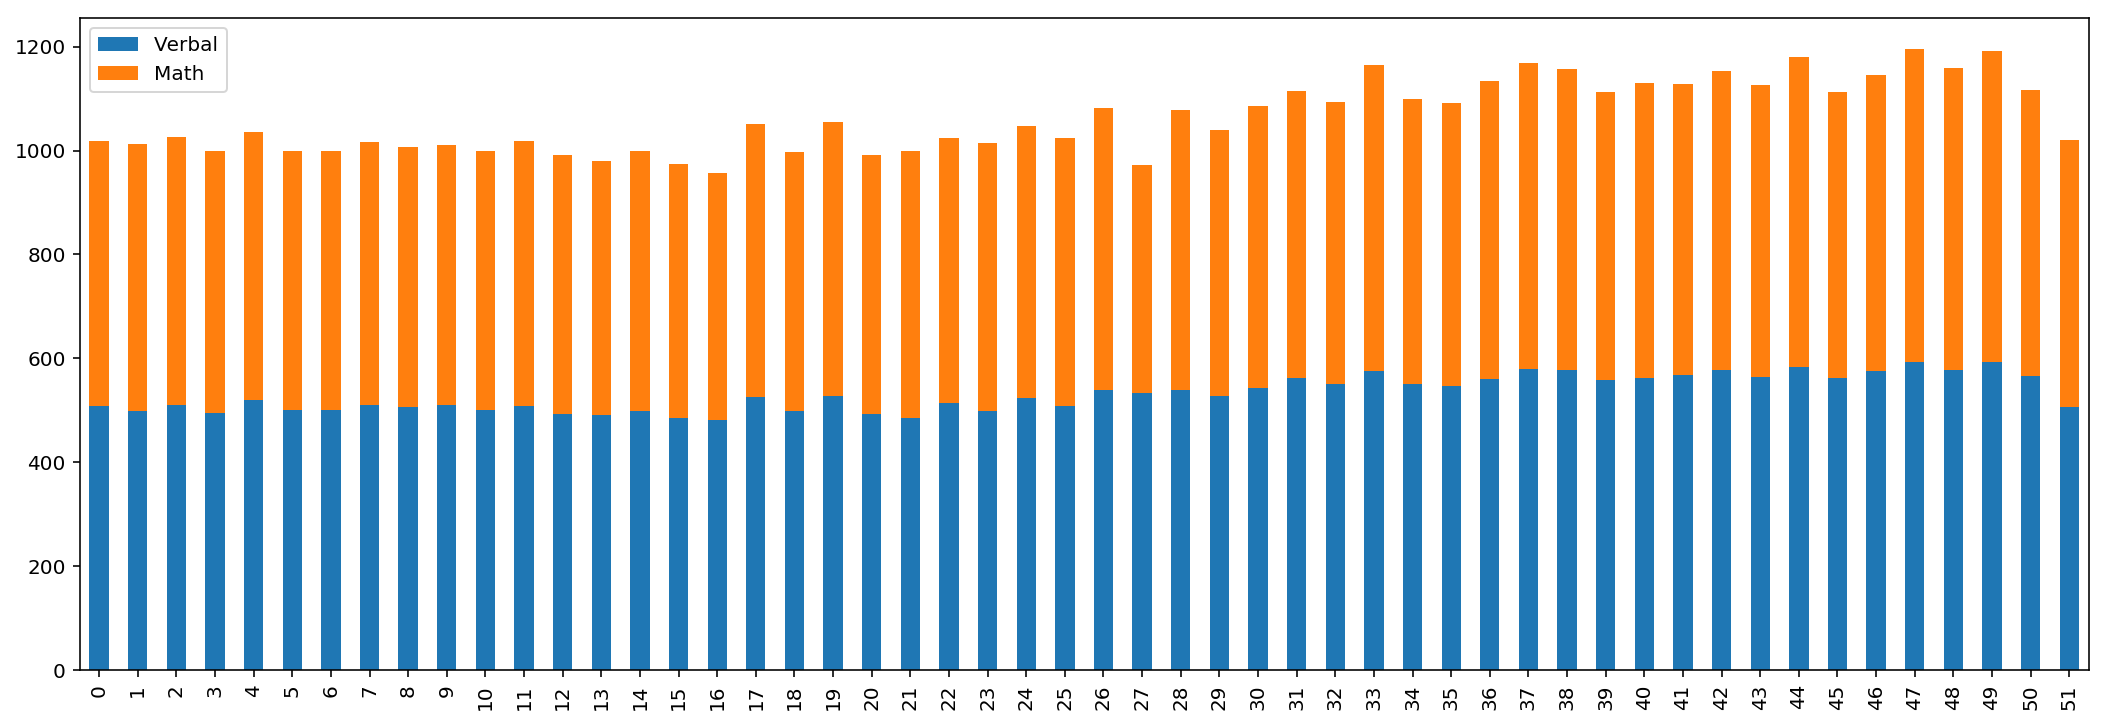

In [9]:

pand_sat1[['Verbal','Math']].plot( kind='bar', stacked=True,figsize=(18,6))
plt.show()

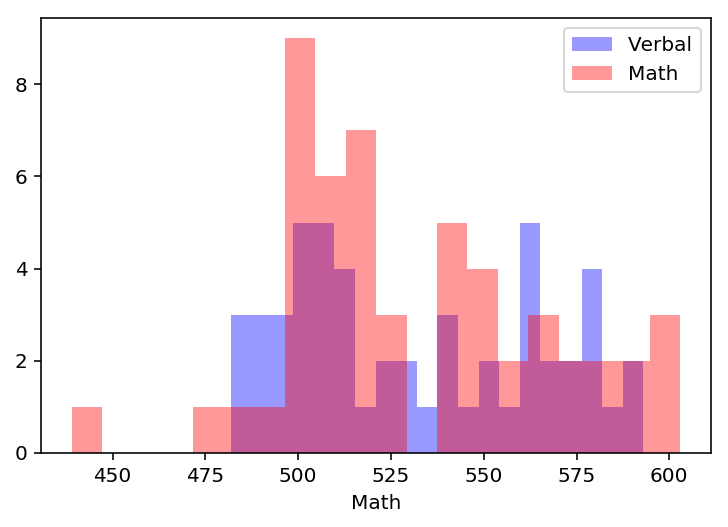

In [192]:
# distribution of Verbal and Math data 

_ = sns.distplot(pand_sat1.Verbal,kde=False, bins=20, color ="b" ,label="Verbal")
_ =sns.distplot(pand_sat1.Math,kde=False, bins=20, color= "r", label = 'Math')
plt.legend()
plt.show()

#### Plot `Verbal` and `Math` on the same chart using boxplots



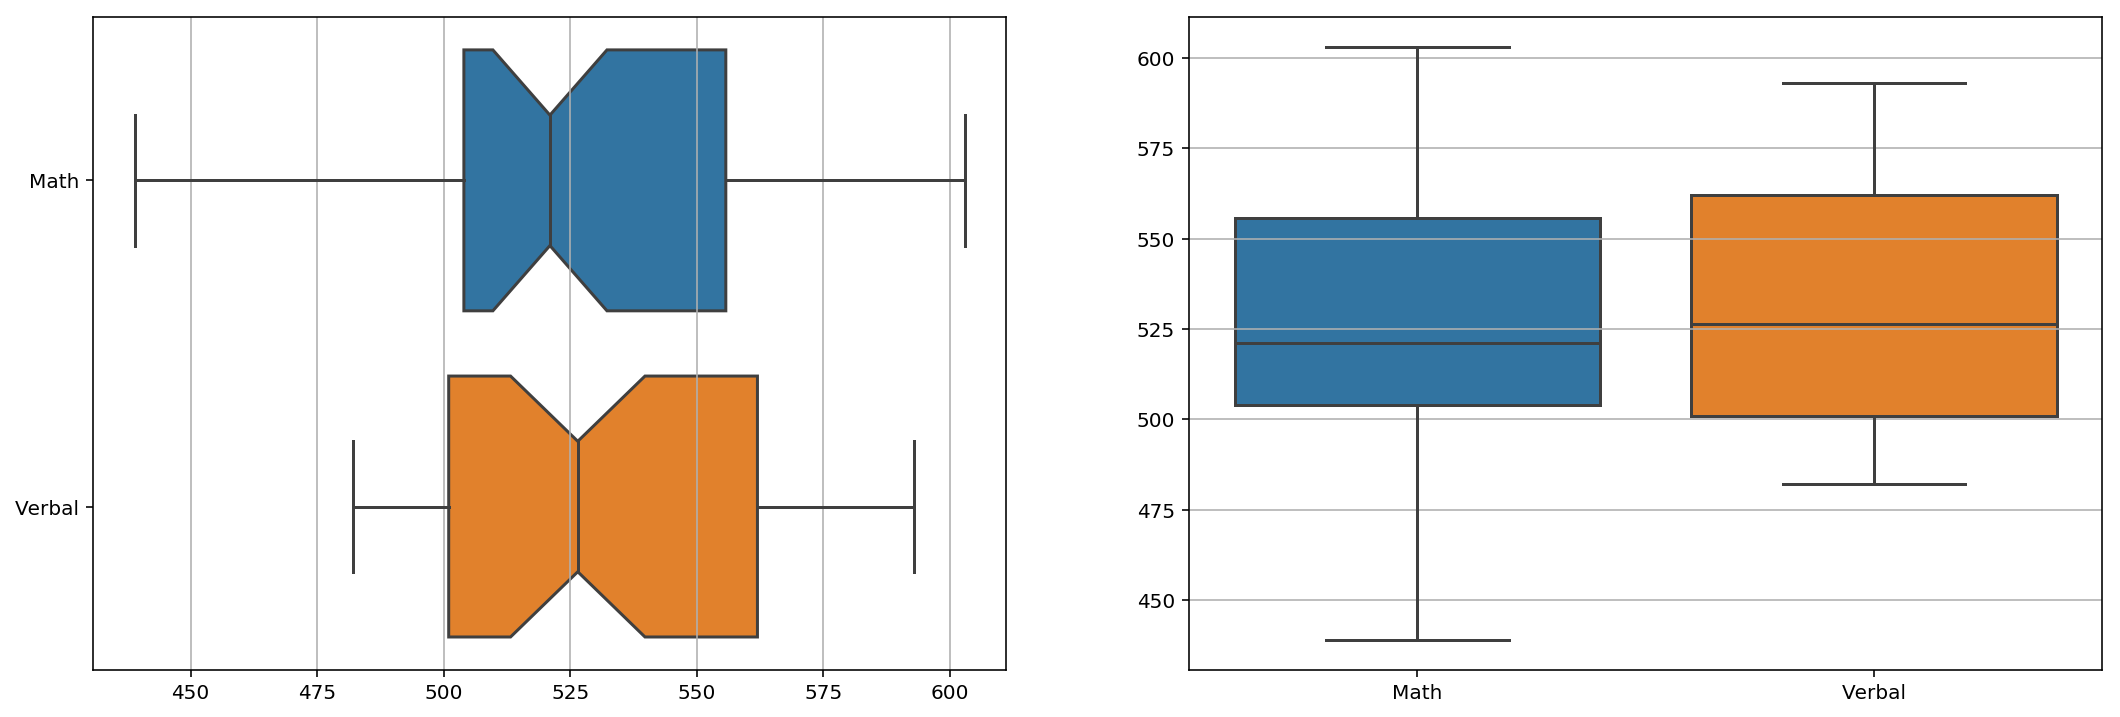

In [11]:
plt.figure(figsize=(18,6))
plt.subplot(1,2,1)
plt.grid()
sns.boxplot(data= pand_sat1[['Math','Verbal']],notch=True,orient="h")
plt.subplot(1,2,2)
plt.grid()          
sns.boxplot(data= pand_sat1[['Math','Verbal']])



### 4Plot `Verbal`, `Math`, and `Rate` appropriately on the same boxplot chart



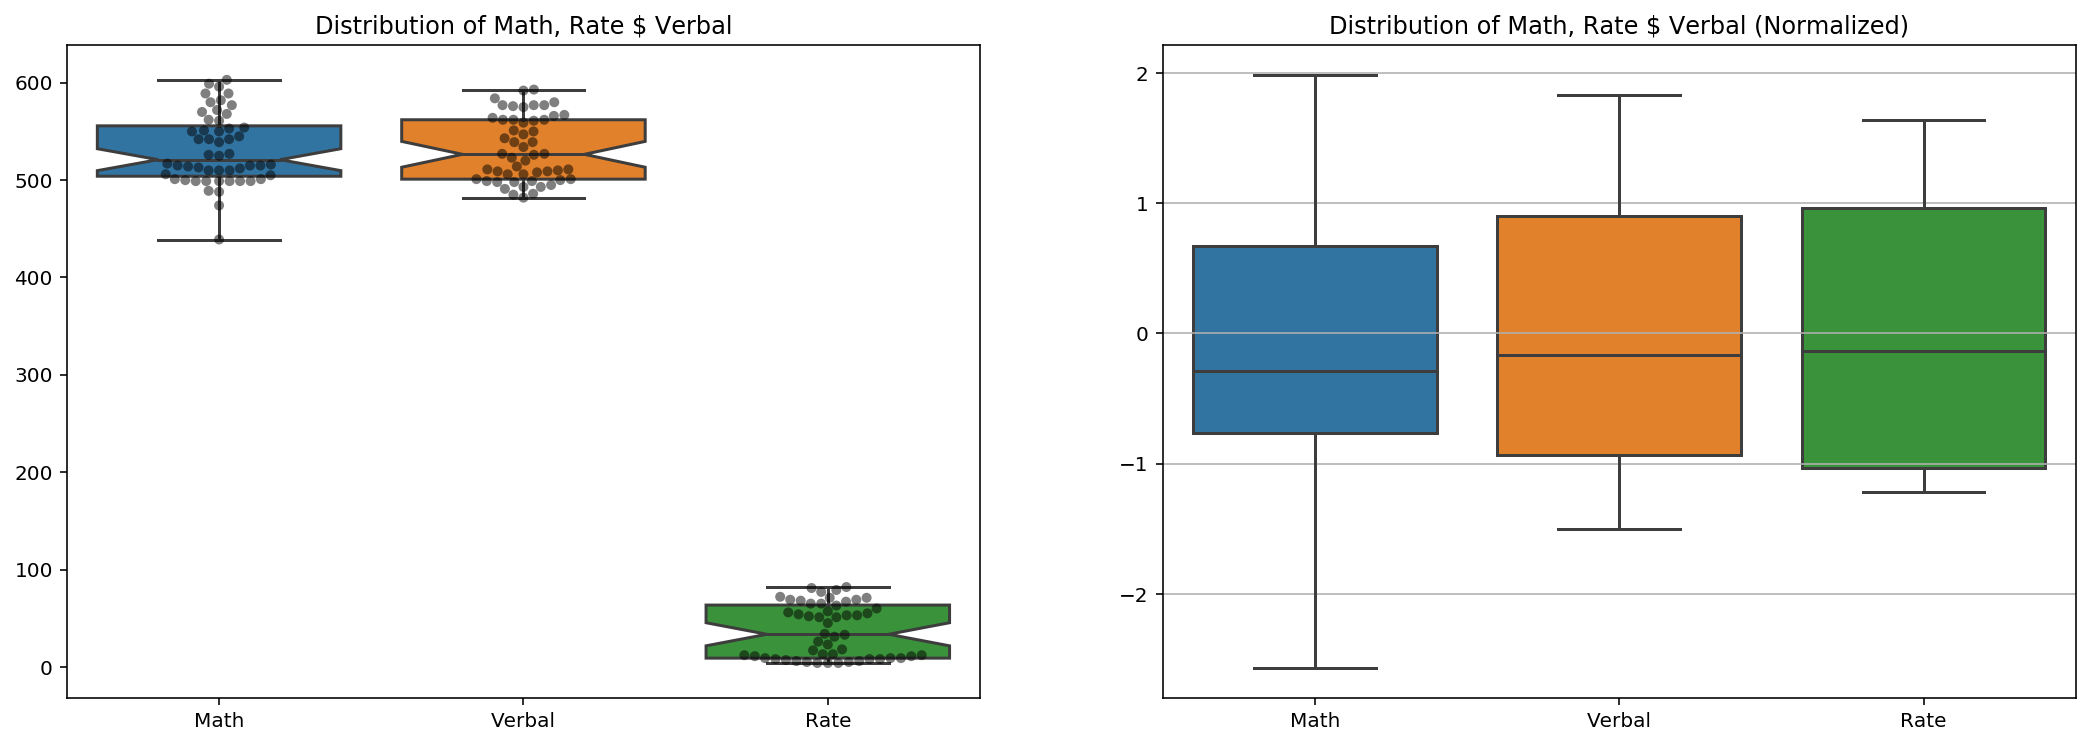

In [12]:
#boxplot of 

plt.figure(figsize=(18,6))
plt.subplot(1,2,1)
plt.title('Distribution of Math, Rate $ Verbal')
_=sns.boxplot(data= pand_sat1[['Math','Verbal','Rate']],notch=True)
_=sns.swarmplot(data= pand_sat1[['Math','Verbal','Rate']], color="black", alpha=0.5)
plt.subplot(1,2,2)
plt.grid() 


# Standardised
ndf = pand_sat1[['Math','Verbal','Rate']]
ndf
pand_sat1_norm = (ndf-ndf.mean())/ndf.std()
pand_sat1_norm
plt.title('Distribution of Math, Rate $ Verbal (Normalized)')
_=sns.boxplot(data= pand_sat1_norm)



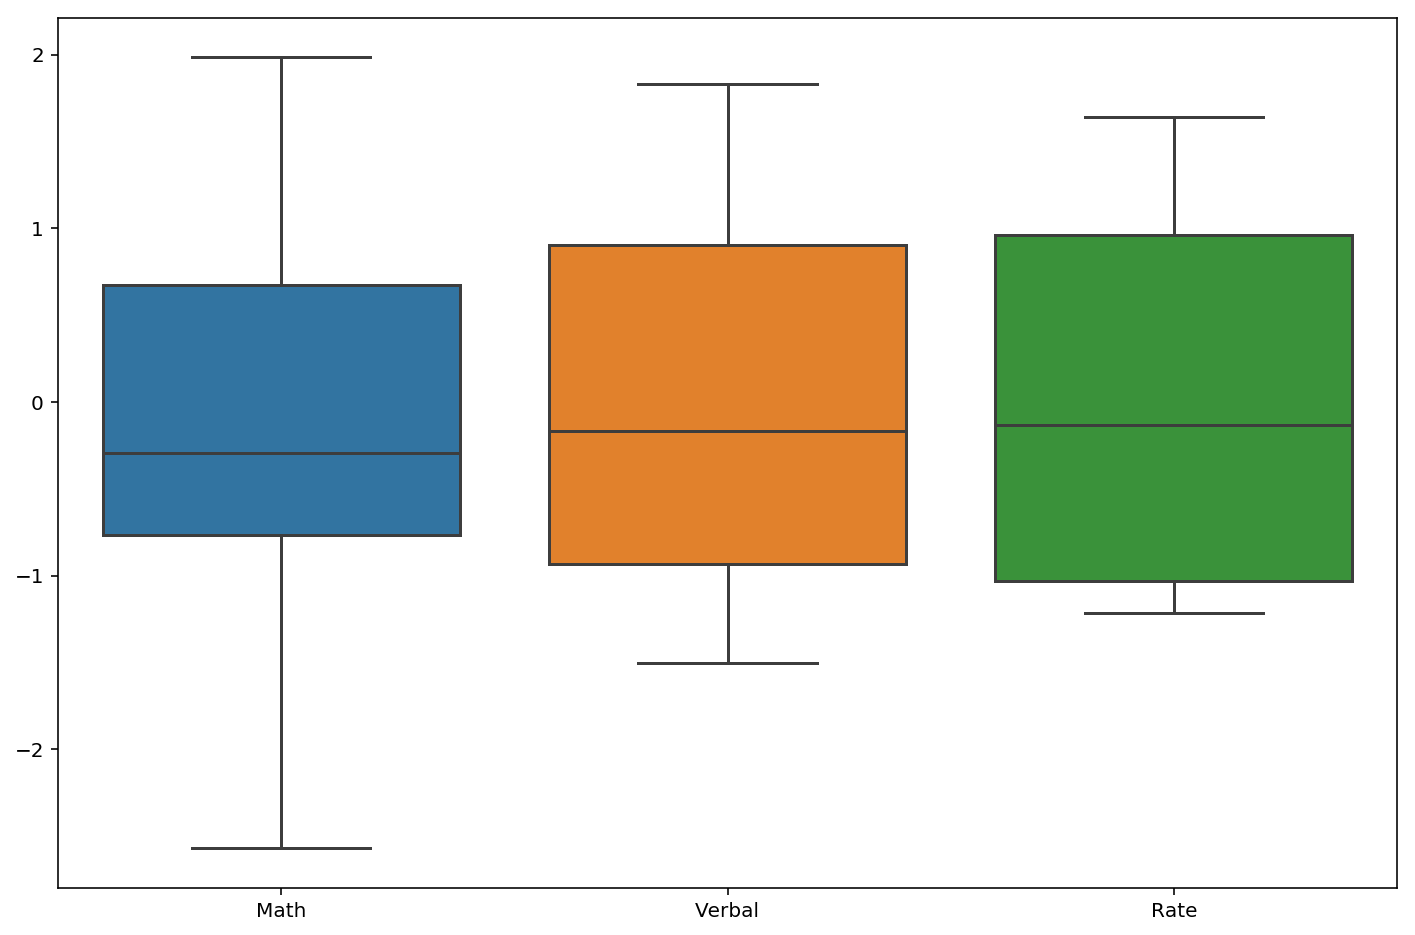

In [13]:
plt.figure(figsize=(12,8))
ndf = pand_sat1[['Math','Verbal','Rate']]
ndf
pand_sat1_norm = (ndf-ndf.mean())/ndf.std()
pand_sat1_norm
sns.boxplot(data= pand_sat1_norm)  


## Create and examine subsets of the data


### Find the list of states that have `Verbal` scores greater than the average of `Verbal` scores across states

In [14]:
mean_verbal = pand_sat1['Verbal'].mean()
mean_verbal
# mean of the Verbal
print ('Mean Verbal Scores of all the States is' + ' ' + str (mean_verbal) + '\n\n')
sts_verscr_grttn_menscr  = [pand_sat1.loc[pand_sat1['Verbal'] > mean_verbal, 'State']]
print ('List of States whose individual Verbal score is greater than the average score of all states\n\n' + ' ' + str(sts_verscr_grttn_menscr))


Mean Verbal Scores of all the States is 532.019230769


List of States whose individual Verbal score is greater than the average score of all states

 [26    CO
27    OH
28    MT
30    ID
31    TN
32    NM
33    IL
34    KY
35    WY
36    MI
37    MN
38    KS
39    AL
40    NE
41    OK
42    MO
43    LA
44    WI
45    AR
46    UT
47    IA
48    SD
49    ND
50    MS
Name: State, dtype: object]


### Find the list of states that have `Verbal` scores greater than the median of `Verbal` scores across states

How does this compare to the list of states greater than the mean of `Verbal` scores? Why?

In [15]:
median_verbal = pand_sat1['Verbal'].median()
print ( 'Median of the Verbal Scores of all the States is' + ' ' + str (mean_verbal) + '\n\n')
            #caluluating the mean of the Verbal

sts_verscr_grttn_medscr  = [pand_sat1.loc[pand_sat1['Verbal'] > median_verbal , 'State']]
print ('List of States whose individual Verbal score is greater than the median score of all states\n\n' + ' ' + str(sts_verscr_grttn_menscr))
            #list of states that have Verbal scores greater than the median of Verbal scores across states.

x = pd.DataFrame(sts_verscr_grttn_medscr)
x 
            # creating a dataframe

Median of the Verbal Scores of all the States is 532.019230769


List of States whose individual Verbal score is greater than the median score of all states

 [26    CO
27    OH
28    MT
30    ID
31    TN
32    NM
33    IL
34    KY
35    WY
36    MI
37    MN
38    KS
39    AL
40    NE
41    OK
42    MO
43    LA
44    WI
45    AR
46    UT
47    IA
48    SD
49    ND
50    MS
Name: State, dtype: object]


,19,26,27,28,29,30,31,32,33,34,...,41,42,43,44,45,46,47,48,49,50
State,WA,CO,OH,MT,WV,ID,TN,NM,IL,KY,...,OK,MO,LA,WI,AR,UT,IA,SD,ND,MS


### 5.3 Create a column that is the difference between the `Verbal` and `Math` scores

Specifically, this should be `Verbal - Math`.

In [16]:
pand_sat1['diff'] = pand_sat1['Verbal'] - pand_sat1['Math']
pand_sat1.head(5)

,State,Rate,Verbal,Math,diff
0,CT,82,509,510,-1
1,NJ,81,499,513,-14
2,MA,79,511,515,-4
3,NY,77,495,505,-10
4,NH,72,520,516,4


### Create two new DataFrames showing states with the greatest difference between scores

In [17]:
tptn_sts_grtr_diff = pand_sat1.sort_values('diff',ascending=False)

          #sorting the difference in descending order

tptn_states = pd.DataFrame(tptn_sts_grtr_diff['State'])

          #States with top 10 greatest differences between scores

print ('10 states with the greatest gap between verbal and math scores where Verbal is greater than Math are')

tptn_states.head(10)

10 states with the greatest gap between verbal and math scores where Verbal is greater than Math are


,State
27,OH
50,MS
29,WV
45,AR
32,NM
31,TN
9,VA
16,DC
8,ME
41,OK


In [18]:
test1  = tptn_states.head(10).reset_index()
test1.index +=1
print ('ranking of states')
test1.drop('index',axis=1)


ranking of states


,State
1,OH
2,MS
3,WV
4,AR
5,NM
6,TN
7,VA
8,DC
9,ME
10,OK


##  Examine summary statistics

### Create the correlation matrix of your variables (excluding `State`).



            Rate    Verbal      Math      diff
Rate    1.000000 -0.886432 -0.773746 -0.101412
Verbal -0.886432  1.000000  0.899871  0.052600
Math   -0.773746  0.899871  1.000000 -0.388219
diff   -0.101412  0.052600 -0.388219  1.000000


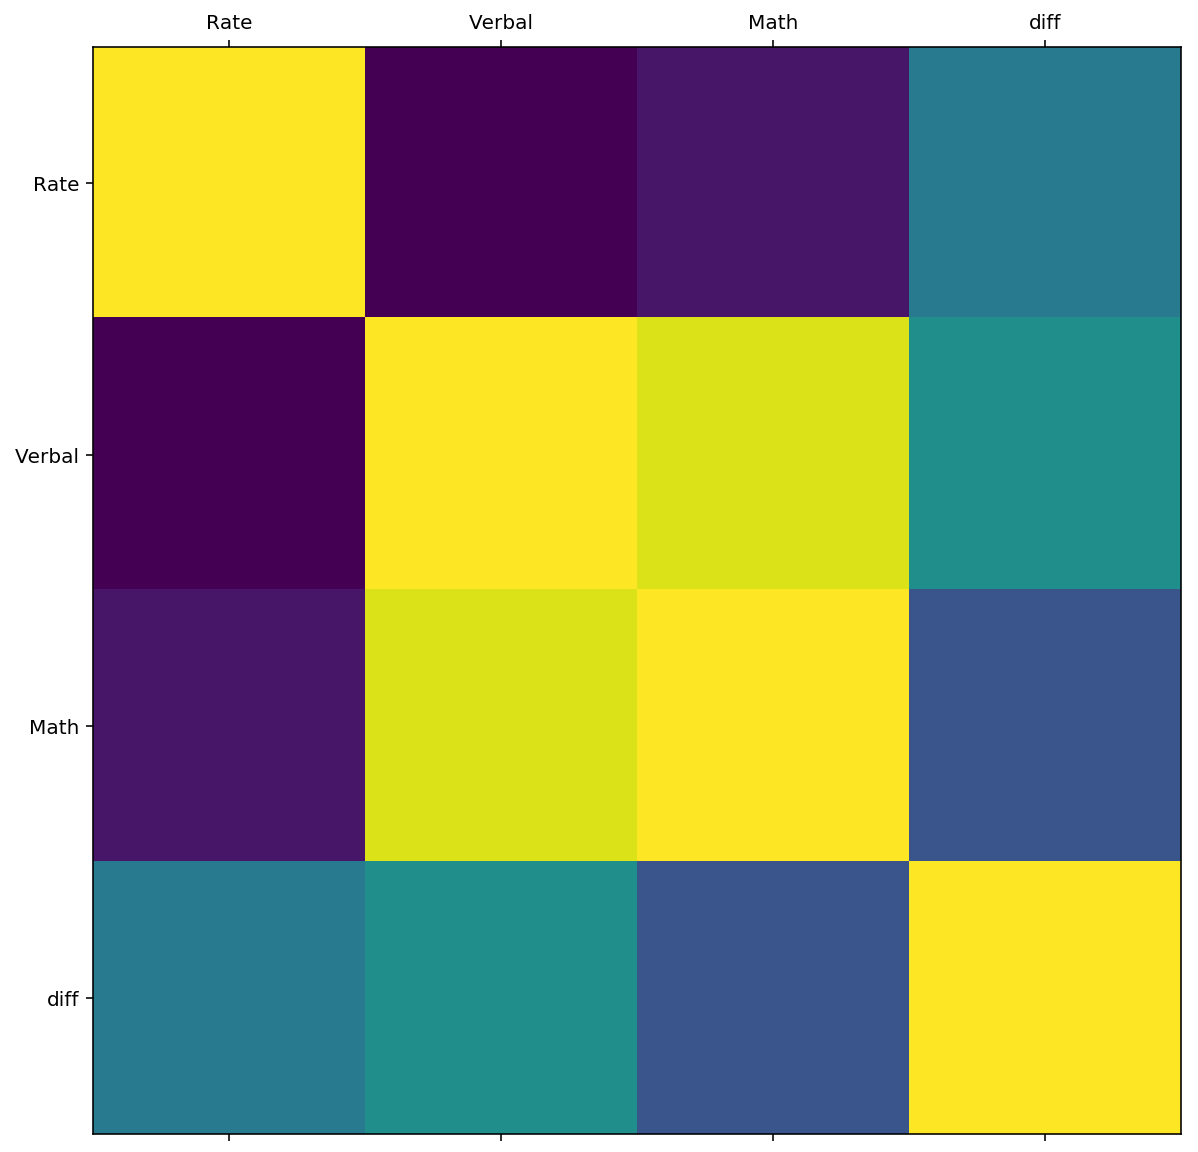

In [19]:
def plot_corr(df,size=10):
    '''Function plots a graphical correlation matrix for each pair of columns in the dataframe.

    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot'''

    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns);
    plt.yticks(range(len(corr.columns)), corr.columns);
    print(corr)

    
plot_corr(pand_sat1,size=10)



### Use pandas'  `.describe()` built-in function on your DataFrame


In [20]:
pand_sat1.describe()

,Rate,Verbal,Math,diff
count,52.000000,52.000000,52.000000,52.000000
mean,37.153846,532.019231,531.500000,0.519231
std,27.301788,33.236225,36.014975,15.729939
min,4.000000,482.000000,439.000000,-30.000000
25%,9.000000,501.000000,504.000000,-6.000000
50%,33.500000,526.500000,521.000000,0.000000
75%,63.500000,562.000000,555.750000,4.250000
max,82.000000,593.000000,603.000000,95.000000



    count = how many data points we have for that column
    mean = the average of that column
    std = the standard deviation, or the "variability" of that column, higher means more sparse
    min = the minimum vaue within that column
    percentile --> What percent of the population has at least this value
    25%, the 25th percentile. 25% of the values in the column has at at least this value. Same for 50, 75.
    max = the highest value in the column





### Assign and print the _covariance_ matrix for the dataset

In [21]:
#covariance matrix for the dataset
co_var = pand_sat1.cov()
co_rel = pand_sat1.corr()
print co_rel
print co_var


            Rate    Verbal      Math      diff
Rate    1.000000 -0.886432 -0.773746 -0.101412
Verbal -0.886432  1.000000  0.899871  0.052600
Math   -0.773746  0.899871  1.000000 -0.388219
diff   -0.101412  0.052600 -0.388219  1.000000
              Rate       Verbal         Math        diff
Rate    745.387632  -804.355958  -760.803922  -43.552036
Verbal -804.355958  1104.646682  1077.147059   27.499623
Math   -760.803922  1077.147059  1297.078431 -219.931373
diff    -43.552036    27.499623  -219.931373  247.430995


### how the covariance matrix is different from the correlation matrix.
   A. covariance is the measure of correlation matrix and correlation is the measure of how strongly two random variables are related. 

#### process to convert the covariance into the correlation.

Basically , 

In Math we have formula like 
                   correlation(X,Y)  =   [covariance(X,Y]/ [(standard deviation of the variables (X) and (Y)]

#### Why is the correlation matrix preferred to the covariance matrix for examining relationships in your data?
With correlation, all variables are normed and one does not need to understand the scale of each variable to understand the value of the correlation, simply looking at the correlation number is enough for inference.

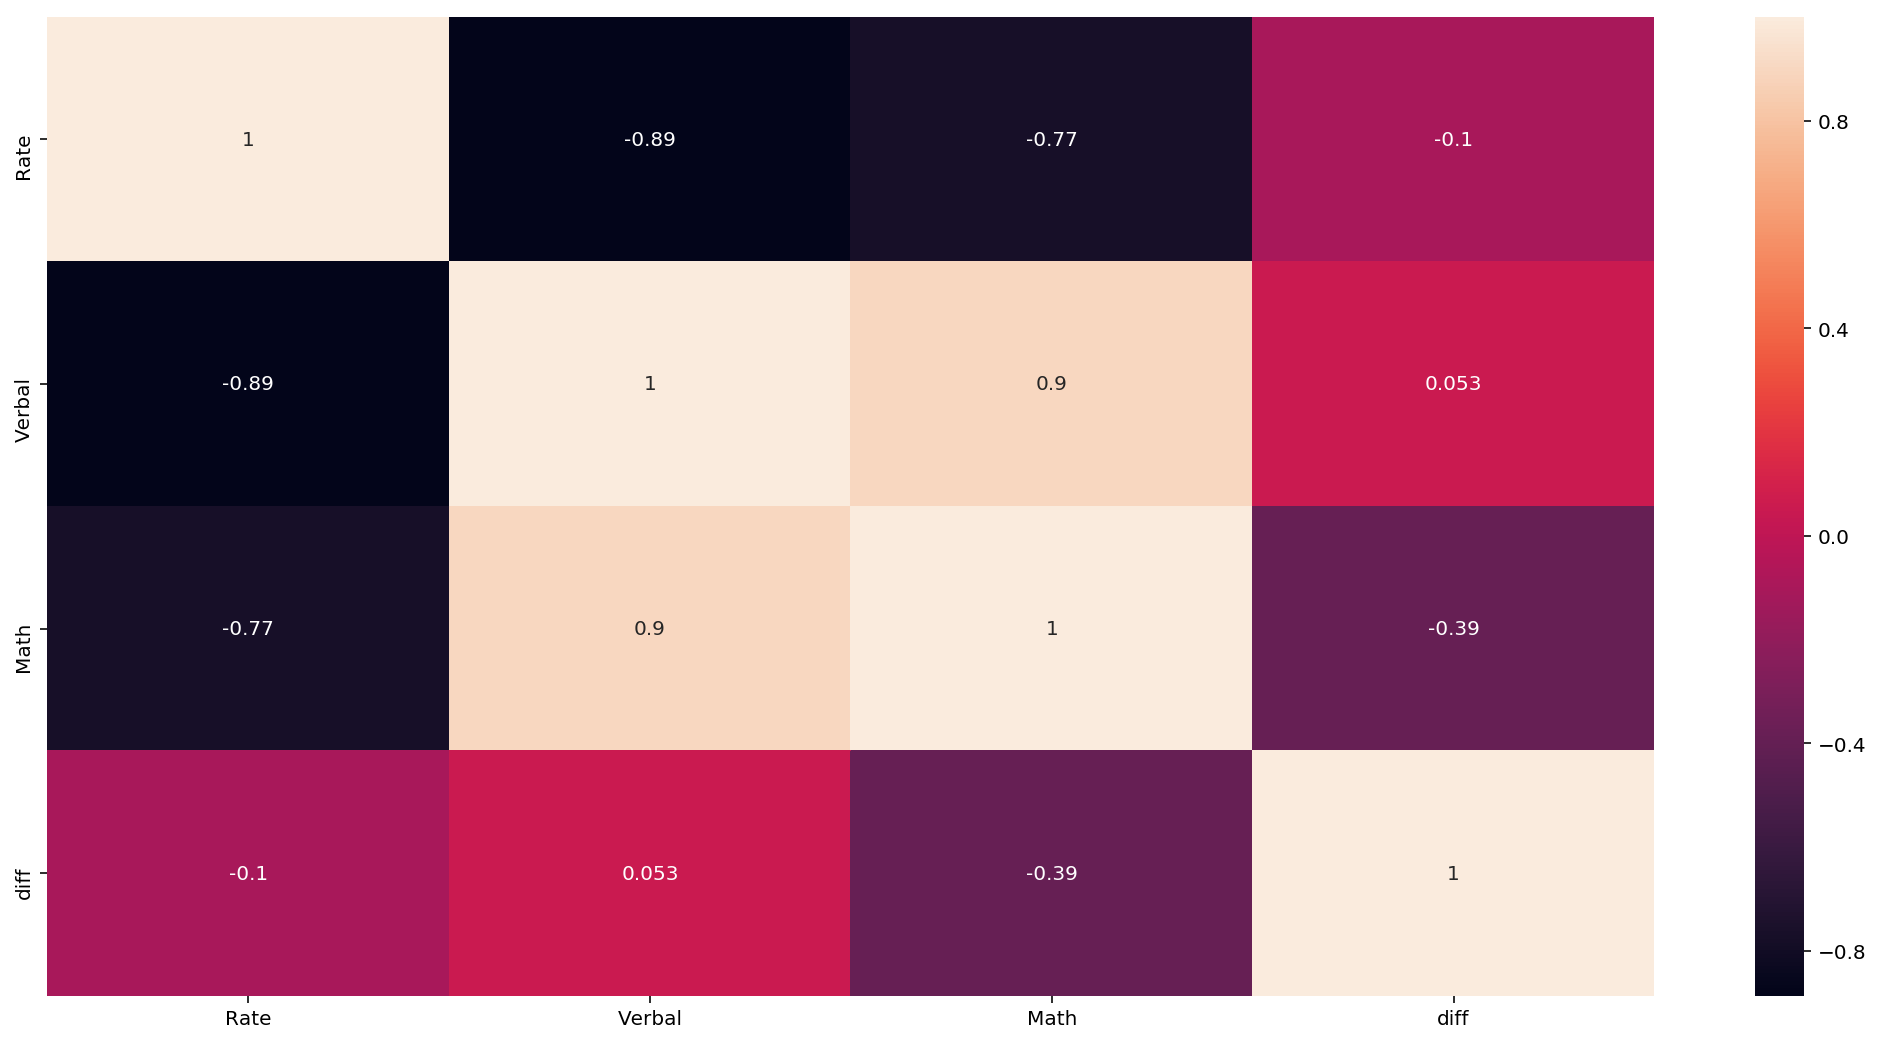

In [22]:
plt.figure(figsize=(18,9))
_ = sns.heatmap(co_rel, annot=True,linecolor='white',)




## Performing EDA on "drug use by age" data.

We'll work with the "drug-use-by-age.csv" data, sourced from and described here: https://github.com/fivethirtyeight/data/tree/master/drug-use-by-age.


In [77]:
df_drug = pd.read_csv('drug-use-by-age.csv')
df_drug.info()
#distribution of data.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 28 columns):
age                        17 non-null object
n                          17 non-null int64
alcohol-use                17 non-null float64
alcohol-frequency          17 non-null float64
marijuana-use              17 non-null float64
marijuana-frequency        17 non-null float64
cocaine-use                17 non-null float64
cocaine-frequency          17 non-null object
crack-use                  17 non-null float64
crack-frequency            17 non-null object
heroin-use                 17 non-null float64
heroin-frequency           17 non-null object
hallucinogen-use           17 non-null float64
hallucinogen-frequency     17 non-null float64
inhalant-use               17 non-null float64
inhalant-frequency         17 non-null object
pain-releiver-use          17 non-null float64
pain-releiver-frequency    17 non-null float64
oxycontin-use              17 non-null float64
oxycontin-f

#### Does this data require cleaning? Are variables missing? How will this affect your approach to EDA on the data?

Yes, this data require cleaning . There are some missing values in the data , Where i Replaced with NaN values. missing data is nothing but there are no records or patients for that perticular case or variable.
missing values can have a significant effect on the conclusions that can be drawn from the data.but here we can assume there are no record of use for that particular age group.

Here the age is of datatype object. lets convert it into interger so that we can dig some insights on data by using age as an metric.

###  A high-level, initial overview of the data

Get a feel for what this dataset is all about.

Use whichever techniques you'd like, including those from the SAT dataset EDA. The final response to this question should be a written description of what you infer about the dataset.

Some things to consider doing:

- Look for relationships between variables and subsets of those variables' values
- Derive new features from the ones available to help your analysis
- Visualize everything!

In [78]:
#Look for relationships between variables and subsets of those variables' values
df_cormat = df_drug.corr()
use = [use for use in df_drug.columns[2::2]]
df_drug_use = df_drug [use]
df_drug_use.columns
freq = [frequency for frequency in df_drug.columns[1::2]]
df_drug_freq = df_drug [freq]

print df_drug_use.head()
df_drug_freq.head()

   alcohol-use  marijuana-use  cocaine-use  crack-use  heroin-use  \
0          3.9            1.1          0.1        0.0         0.1   
1          8.5            3.4          0.1        0.0         0.0   
2         18.1            8.7          0.1        0.0         0.1   
3         29.2           14.5          0.5        0.1         0.2   
4         40.1           22.5          1.0        0.0         0.1   

   hallucinogen-use  inhalant-use  pain-releiver-use  oxycontin-use  \
0               0.2           1.6                2.0            0.1   
1               0.6           2.5                2.4            0.1   
2               1.6           2.6                3.9            0.4   
3               2.1           2.5                5.5            0.8   
4               3.4           3.0                6.2            1.1   

   tranquilizer-use  stimulant-use  meth-use  sedative-use  
0               0.2            0.2       0.0           0.2  
1               0.3            0.3  

,n,alcohol-frequency,marijuana-frequency,cocaine-frequency,crack-frequency,heroin-frequency,hallucinogen-frequency,inhalant-frequency,pain-releiver-frequency,oxycontin-frequency,tranquilizer-frequency,stimulant-frequency,meth-frequency,sedative-frequency
0,2798,3.0,4.0,5.0,-,35.5,52.0,19.0,36.0,24.5,52.0,2.0,-,13.0
1,2757,6.0,15.0,1.0,3.0,-,6.0,12.0,14.0,41.0,25.5,4.0,5.0,19.0
2,2792,5.0,24.0,5.5,-,2.0,3.0,5.0,12.0,4.5,5.0,12.0,24.0,16.5
3,2956,6.0,25.0,4.0,9.5,1.0,4.0,5.5,10.0,3.0,4.5,6.0,10.5,30.0
4,3058,10.0,30.0,7.0,1.0,66.5,3.0,3.0,7.0,4.0,11.0,9.5,36.0,3.0


In [79]:
#Derive new features from the ones available to help your analysis
"""list of uses and frequencies and plot the trend for these against age"""

#convert type of age from object to int using regular expressions here i considered the upper value to be age.
import re
number = '(^[*0-9.]*)'

In [80]:
df_drug['age'] = [element[0] for element in df_drug['age'].apply(lambda x: (re.findall(number,x)) )]

In [143]:
#filled nan values with 0 - no data means no use of drug for that age group.

df_drug.fillna(0).head(10)


,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
0,12,2798,3.9,3.0,1.1,4.0,0.1,5.0,0.0,-,...,0.1,24.5,0.2,52.0,0.2,2.0,0.0,-,0.2,13.0
1,13,2757,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.0,...,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0
2,14,2792,18.1,5.0,8.7,24.0,0.1,5.5,0.0,-,...,0.4,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5
3,15,2956,29.2,6.0,14.5,25.0,0.5,4.0,0.1,9.5,...,0.8,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0
4,16,3058,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.0,...,1.1,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0
5,17,3038,49.3,13.0,28.0,36.0,2.0,5.0,0.1,21.0,...,1.4,6.0,3.5,7.0,2.8,9.0,0.6,48.0,0.5,6.5
6,18,2469,58.7,24.0,33.7,52.0,3.2,5.0,0.4,10.0,...,1.7,7.0,4.9,12.0,3.0,8.0,0.5,12.0,0.4,10.0
7,19,2223,64.6,36.0,33.4,60.0,4.1,5.5,0.5,2.0,...,1.5,7.5,4.2,4.5,3.3,6.0,0.4,105.0,0.3,6.0
8,20,2271,69.7,48.0,34.0,60.0,4.9,8.0,0.6,5.0,...,1.7,12.0,5.4,10.0,4.0,12.0,0.9,12.0,0.5,4.0
9,21,2354,83.2,52.0,33.0,52.0,4.8,5.0,0.5,17.0,...,1.3,13.5,3.9,7.0,4.1,10.0,0.6,2.0,0.3,9.0


In [144]:
#changing to integer datatype
df_drug['age'] = df_drug.age.astype(int)
df_drug

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
0,12,2798,3.9,3.0,1.1,4.0,0.1,5.0,0.0,-,...,0.1,24.5,0.2,52.0,0.2,2.0,0.0,-,0.2,13.0
1,13,2757,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.0,...,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0
2,14,2792,18.1,5.0,8.7,24.0,0.1,5.5,0.0,-,...,0.4,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5
3,15,2956,29.2,6.0,14.5,25.0,0.5,4.0,0.1,9.5,...,0.8,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0
4,16,3058,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.0,...,1.1,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0
5,17,3038,49.3,13.0,28.0,36.0,2.0,5.0,0.1,21.0,...,1.4,6.0,3.5,7.0,2.8,9.0,0.6,48.0,0.5,6.5
6,18,2469,58.7,24.0,33.7,52.0,3.2,5.0,0.4,10.0,...,1.7,7.0,4.9,12.0,3.0,8.0,0.5,12.0,0.4,10.0
7,19,2223,64.6,36.0,33.4,60.0,4.1,5.5,0.5,2.0,...,1.5,7.5,4.2,4.5,3.3,6.0,0.4,105.0,0.3,6.0
8,20,2271,69.7,48.0,34.0,60.0,4.9,8.0,0.6,5.0,...,1.7,12.0,5.4,10.0,4.0,12.0,0.9,12.0,0.5,4.0
9,21,2354,83.2,52.0,33.0,52.0,4.8,5.0,0.5,17.0,...,1.3,13.5,3.9,7.0,4.1,10.0,0.6,2.0,0.3,9.0


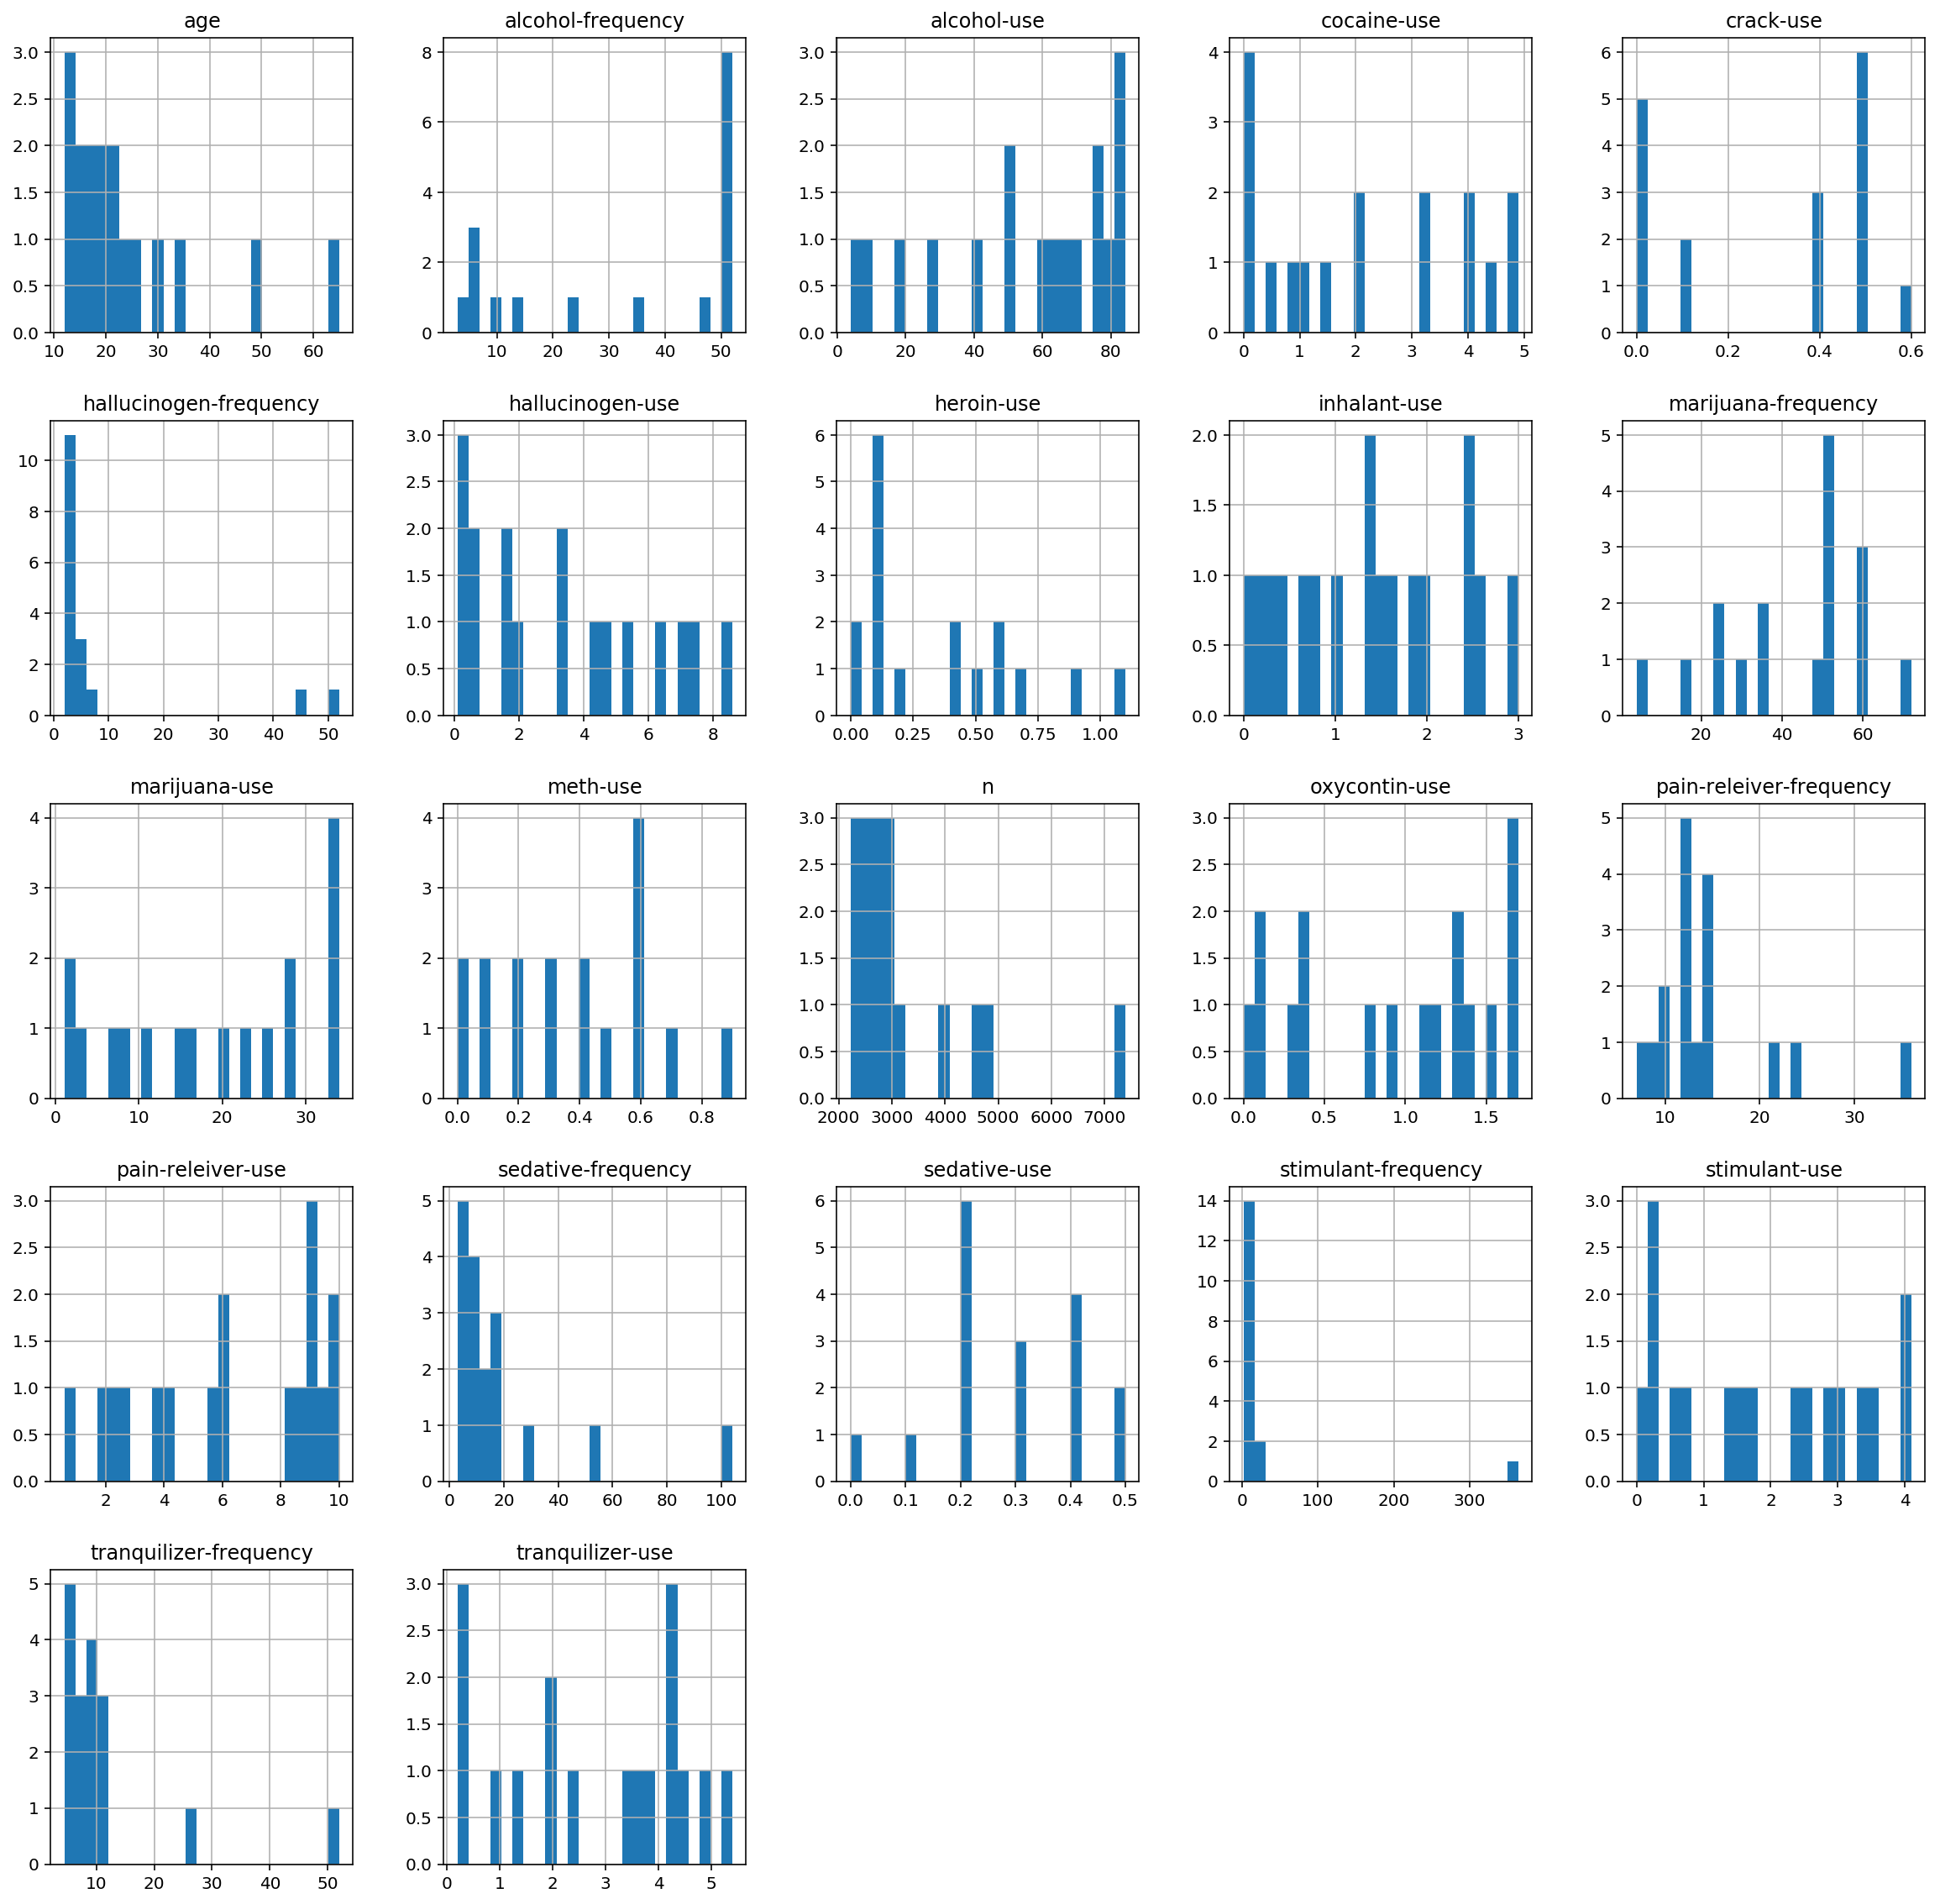

In [83]:
#     Visualize everything!
df_drug.hist(figsize=(20,20),bins=25)
plt.show()

In [84]:
df_drug['cocaine-frequency']
df_drug['crack-frequency']
df_drug['heroin-frequency']
df_drug['inhalant-frequency']
df_drug['oxycontin-frequency']
df_drug['meth-frequency']
df_drug.columns


Index([u'age', u'n', u'alcohol-use', u'alcohol-frequency', u'marijuana-use',
       u'marijuana-frequency', u'cocaine-use', u'cocaine-frequency',
       u'crack-use', u'crack-frequency', u'heroin-use', u'heroin-frequency',
       u'hallucinogen-use', u'hallucinogen-frequency', u'inhalant-use',
       u'inhalant-frequency', u'pain-releiver-use', u'pain-releiver-frequency',
       u'oxycontin-use', u'oxycontin-frequency', u'tranquilizer-use',
       u'tranquilizer-frequency', u'stimulant-use', u'stimulant-frequency',
       u'meth-use', u'meth-frequency', u'sedative-use', u'sedative-frequency'],
      dtype='object')

### Create a testable hypothesis about this data

** Question**
1) Get the list of uses and frequencies and plot the trend for these against age.
2) use of hard drugs against age ? popular drugs acroos all ages?

**deliverables**
visual plots with hard drugs 



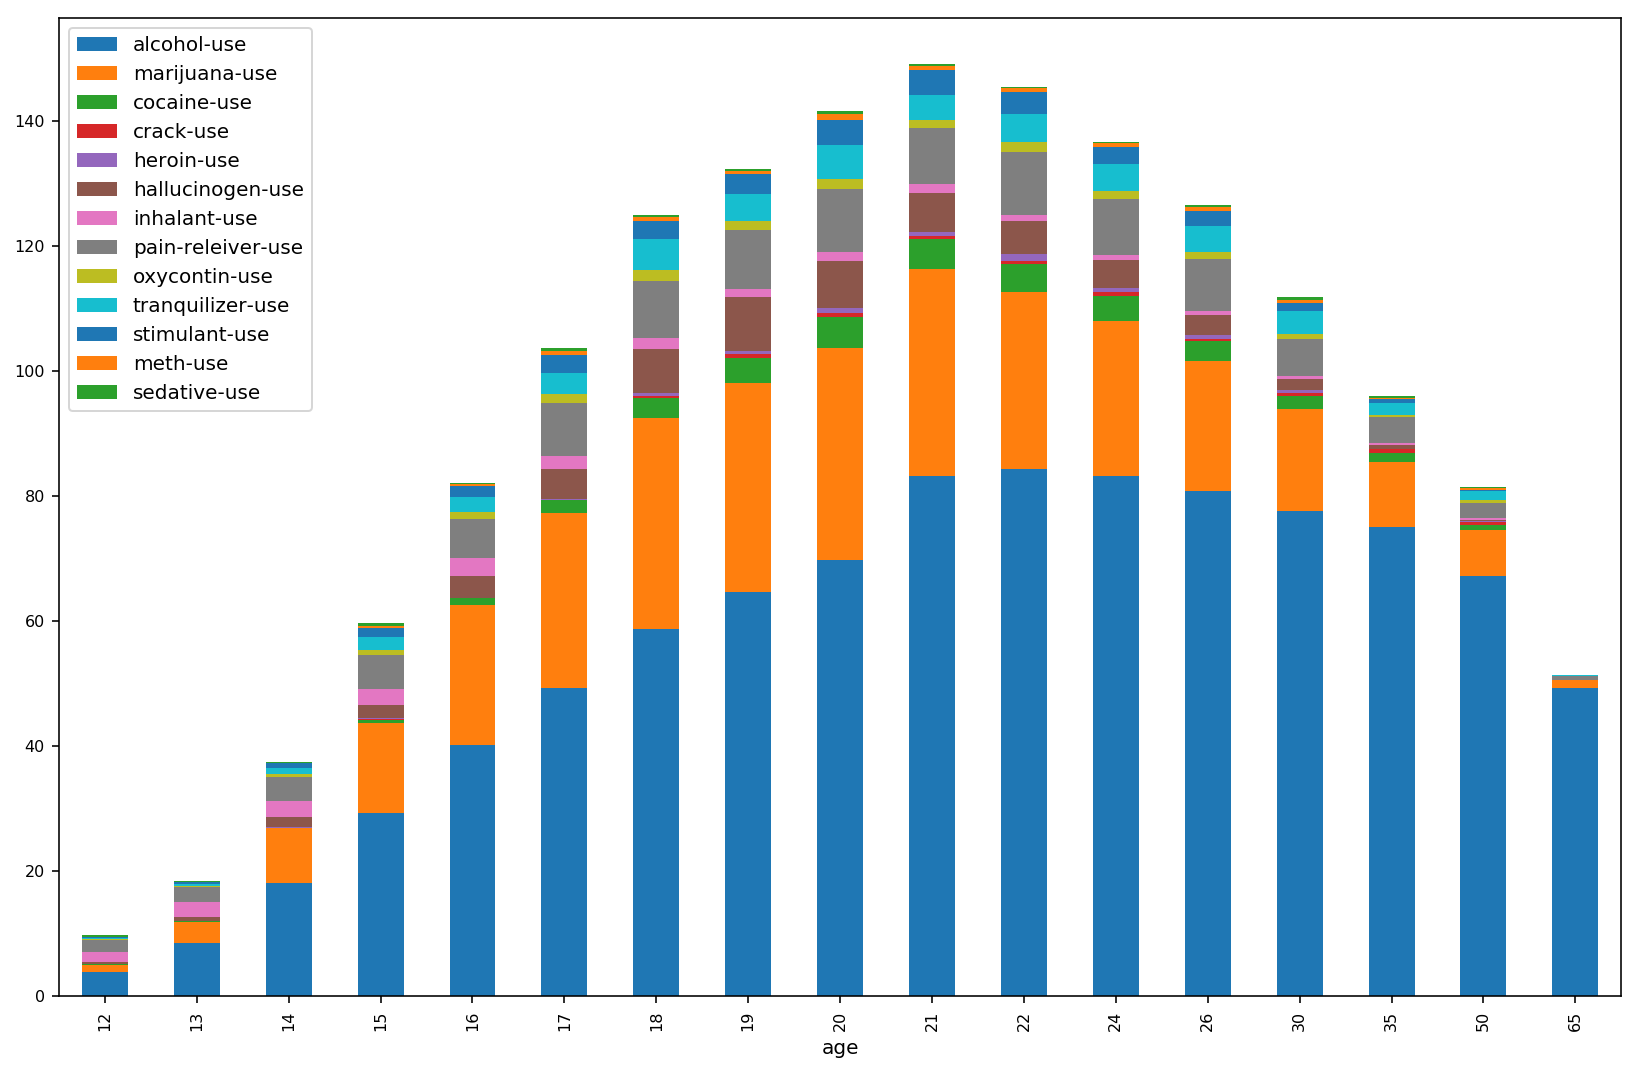

In [163]:
_=df_drug.plot(kind='bar',x='age',y=use,figsize=(14,9),stacked=True,fontsize=8)


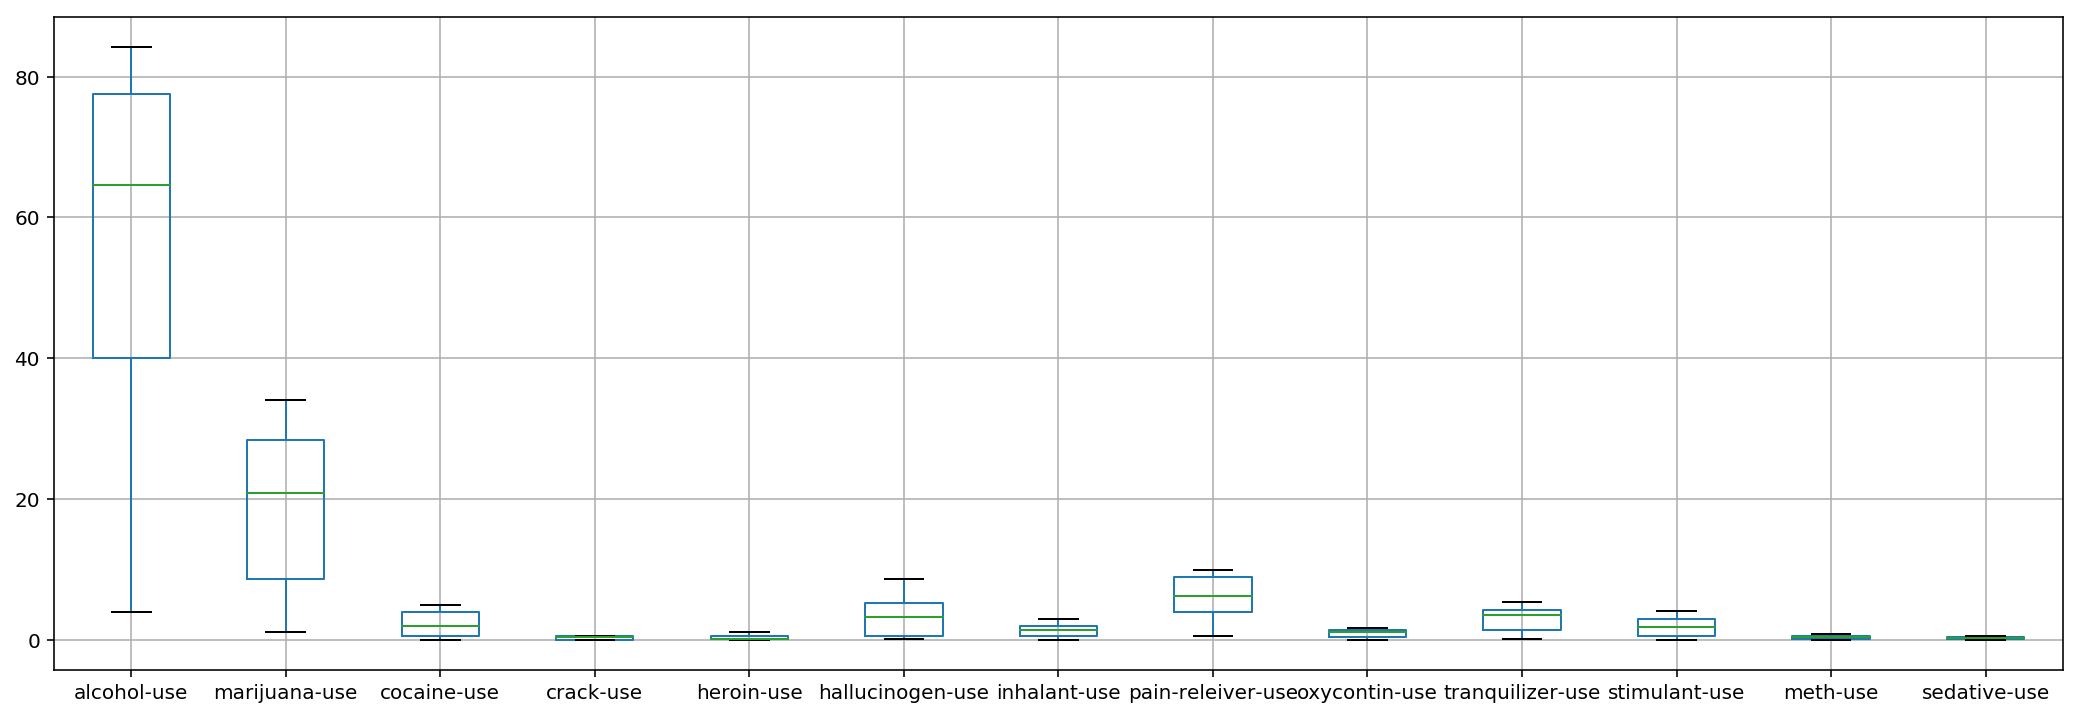

In [122]:
_= df_drug.boxplot(column=use,figsize=(18,6))

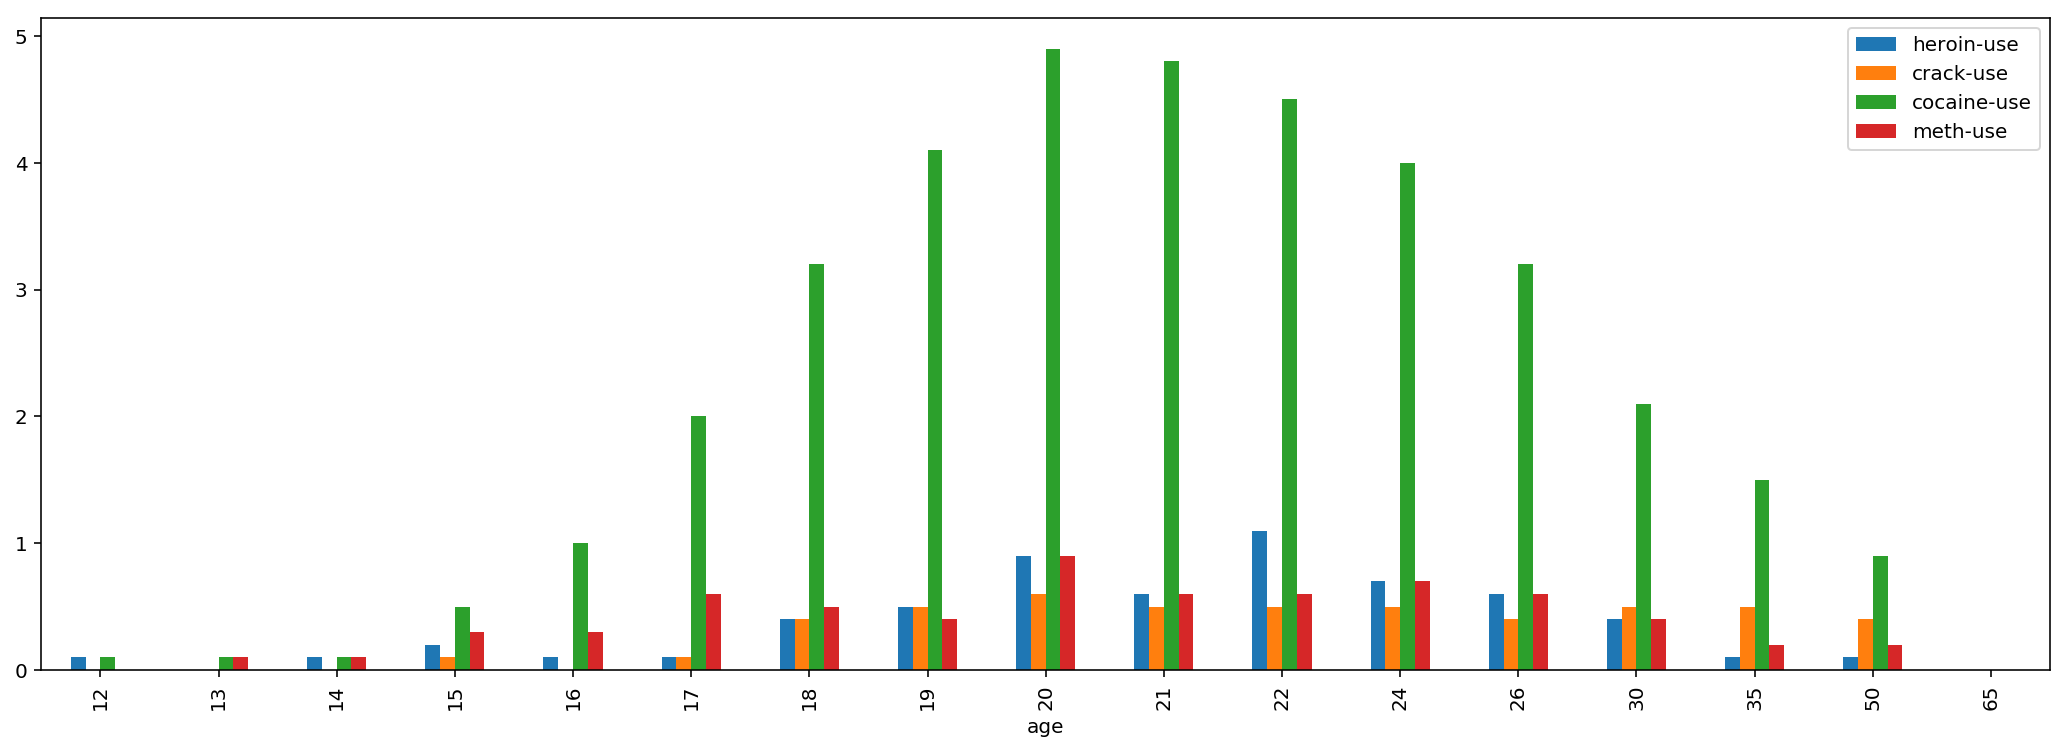

In [187]:
# Code
df_drug_use.plot(kind='bar',x='age',y=['heroin-use','crack-use','cocaine-use','meth-use'],figsize=(18,6))

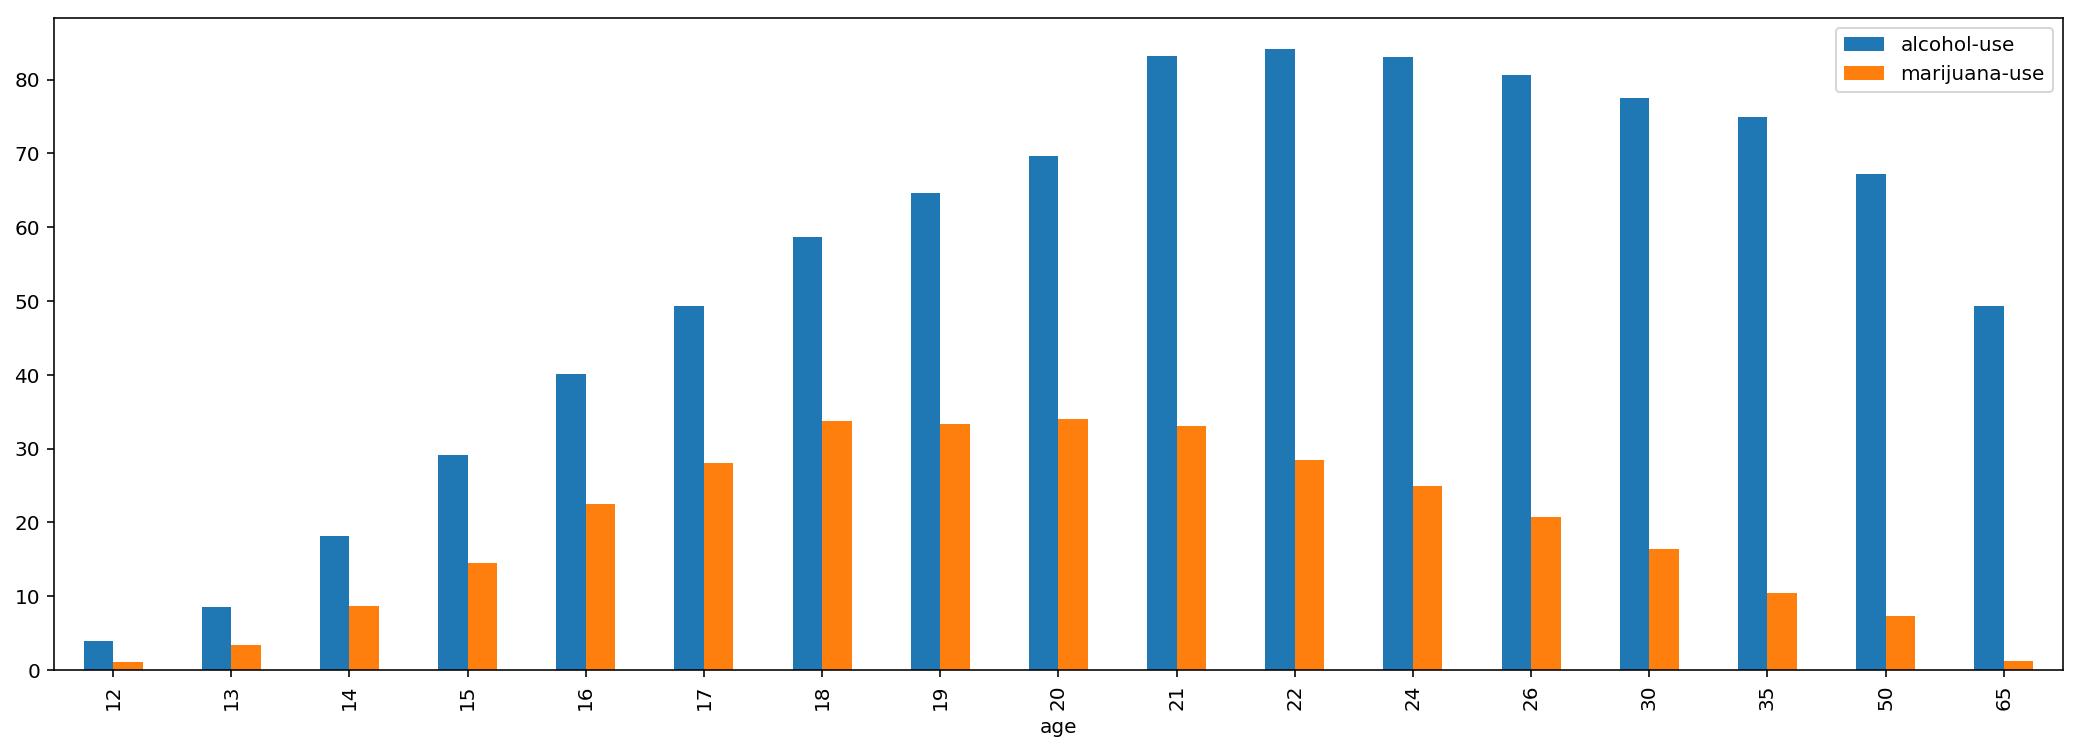

In [188]:
_=df_drug_use.plot(kind='bar',x='age',y= ['alcohol-use','marijuana-use'],figsize=(18,6))

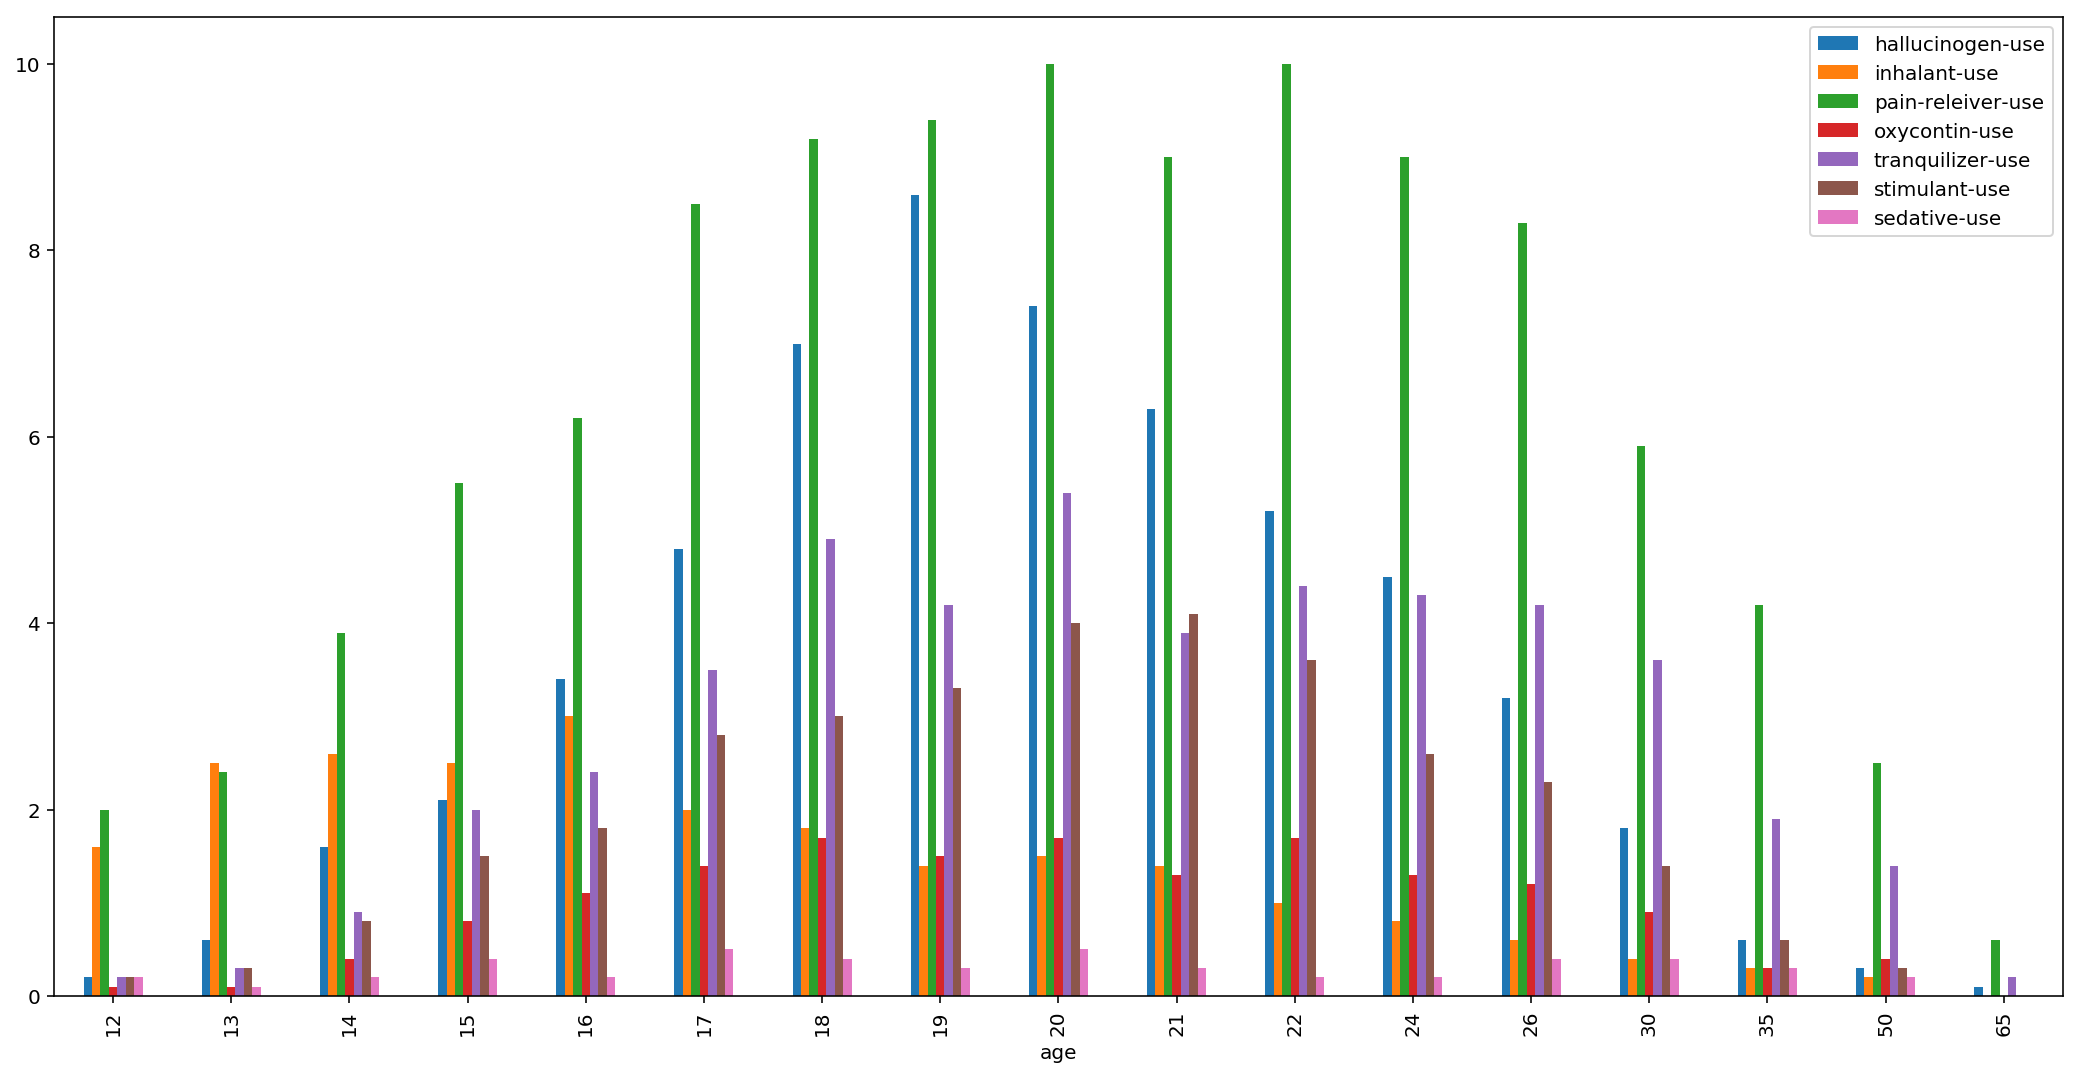

In [191]:
_= df_drug_use.plot(kind='bar',y=['hallucinogen-use','inhalant-use','pain-releiver-use', 
            'oxycontin-use', 'tranquilizer-use','stimulant-use','sedative-use'],x='age',figsize=(18,9))

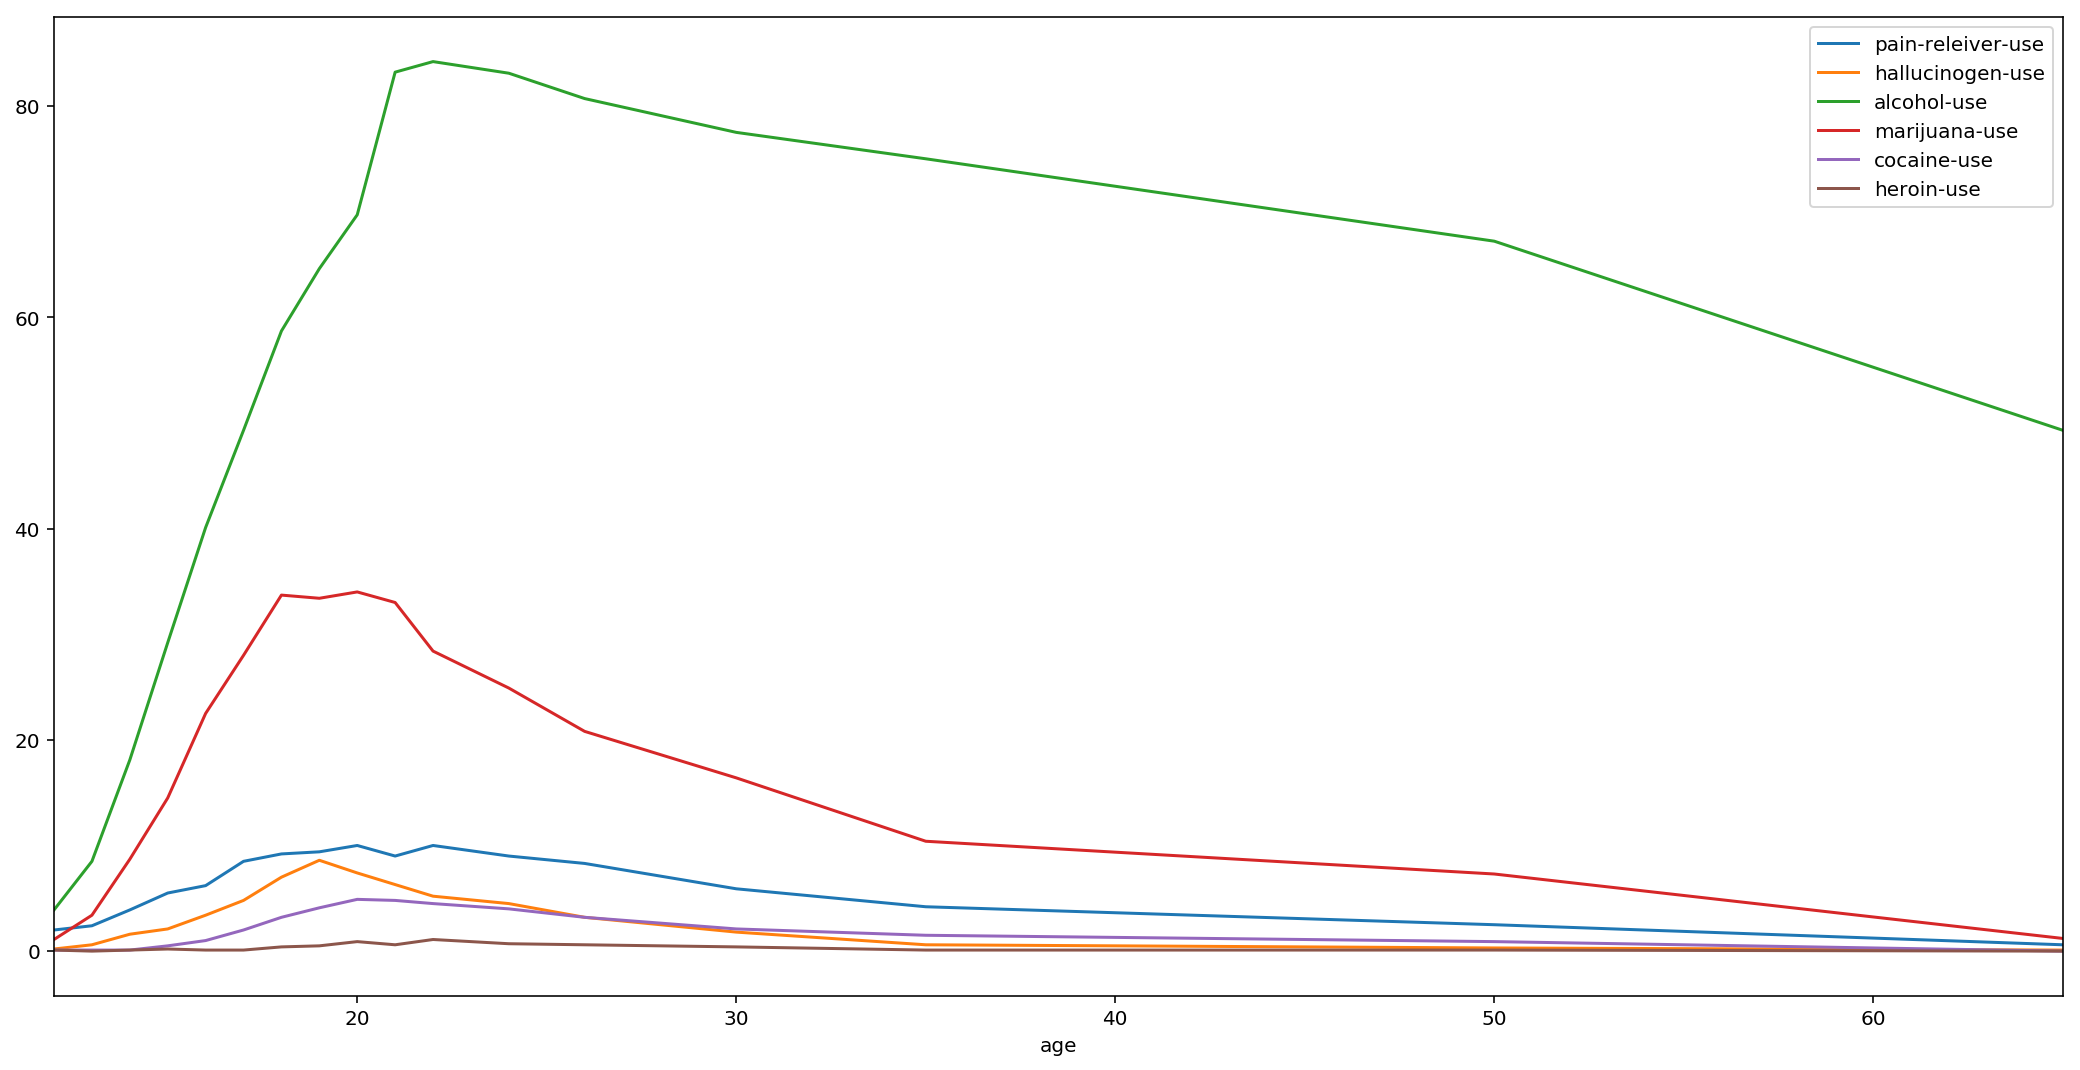

In [186]:
df_drug_use.plot(x='age',y = ['pain-releiver-use','hallucinogen-use','alcohol-use',
                                         'marijuana-use','cocaine-use','heroin-use'],figsize=(18,9))


**Report**


age 20-25 the most popular drugs are 'pain-releiver-use','hallucinogen-use','alcohol-use',
                                         'marijuana-use','cocaine-use','heroin-use'.



## dealing with outliers

---

Outliers are an interesting problem in statistics, in that there is not an agreed upon best way to define them. Subjectivity in selecting and analyzing data is a problem that will recur throughout the course.

In [31]:
#Pull out the rate variable from the sat dataset.
satdrp_rate = pand_sat1.drop(labels='Rate',axis=1)
satdrp_rate.head()


,State,Verbal,Math,diff
0,CT,509,510,-1
1,NJ,499,513,-14
2,MA,511,515,-4
3,NY,495,505,-10
4,NH,520,516,4


##### Are there outliers in the dataset? Define, in words, how you numerically define outliers.

there are no outliers in the data.

    outliers are data points that differ greatly from the trend expressed by the other values in the data set - in other words, they lie outside the other values.
    steps to find outliers numrically 
        1) Arrange the data in ascending order.
        2) Caluculate the median of the dataset(the miidle point of the dataset).
              if there are odd no of data points, the median is the middle value (i.e) number of datapoint 
              should be same or equal to above and below of the median. IF even datapoints then average the
              middle values and that is median.
        3) median is assined as Q2 , 
        4) Calculate the upper quartile Q3. this is the data point where the 25% of the data sits above the median.
        if there are even number of point , Just average the middle values.
        5) Calculate the lower quartile Q1. this is the data point where the 25% of the data sits below the median.
        if there are even number of point , Just average the middle values.
        6)caluculate the inter quartile range by IQR = Q3-Q1
        7) any data which fall outside of q1 and q3 are considered as outliers , based on context and type of data.




### Percentile scoring and spearman rank correlation

---

###  Calculate the spearman correlation of sat `Verbal` and `Math`


In [32]:

scorr = pand_sat1[['Verbal','Math']].corr(method='spearman')

pcorr = pand_sat1[['Verbal','Math']].corr(method='pearson')

print ('spearman correlation of sat Verbal and Math\n\n' + str(scorr))

pcorr

## perason correlation is the linear relationship beween two continues variables, Where as spearman correleation 
## is based on the ranked values for each variable rather than the raw data,the variables tend to change together but not in a 
##constant rate

spearman correlation of sat Verbal and Math

          Verbal      Math
Verbal  1.000000  0.905205
Math    0.905205  1.000000


,Verbal,Math
Verbal,1.000000,0.899871
Math,0.899871,1.000000


#### Describe clearly in words the process of calculating the spearman rank correlation.




### 9.2 Percentile scoring

Look up percentile scoring of data. In other words, the conversion of numeric data to their equivalent percentile scores.

http://docs.scipy.org/doc/numpy-dev/reference/generated/numpy.percentile.html

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html

1. Convert `Rate` to percentiles in the sat scores as a new column.
2. Show the percentile of California in `Rate`.
3. How is percentile related to the spearman rank correlation?

In [33]:
#1.Convert Rate to percentiles in the sat scores as a new column.

pand_sat1['Rate_percentiles'] = np.round(pand_sat1.loc[:, 'Rate'].rank(pct=True)* 100,2)
pand_sat1.head()

,State,Rate,Verbal,Math,diff,Rate_percentiles
0,CT,82,509,510,-1,100.00
1,NJ,81,499,513,-14,98.08
2,MA,79,511,515,-4,96.15
3,NY,77,495,505,-10,94.23
4,NH,72,520,516,4,92.31


In [34]:

#2.Show the percentile of California in Rate.

print '\n\npercentile of California in Rate is ', int(pand_sat1.loc[pand_sat1['State'] == 'CA', 'Rate_percentiles'].iloc[0])



percentile of California in Rate is  56


In [35]:
#3.How is percentile related to the spearman rank correlation?

pand_sat1.Rate.corr(pand_sat1.Rate_percentiles,method='spearman')



0.99999999999999989

### Percentiles and outliers

#1. Why might percentile scoring be useful for dealing with outliers?

Percentile scoring can be used to see sudden jumps in value

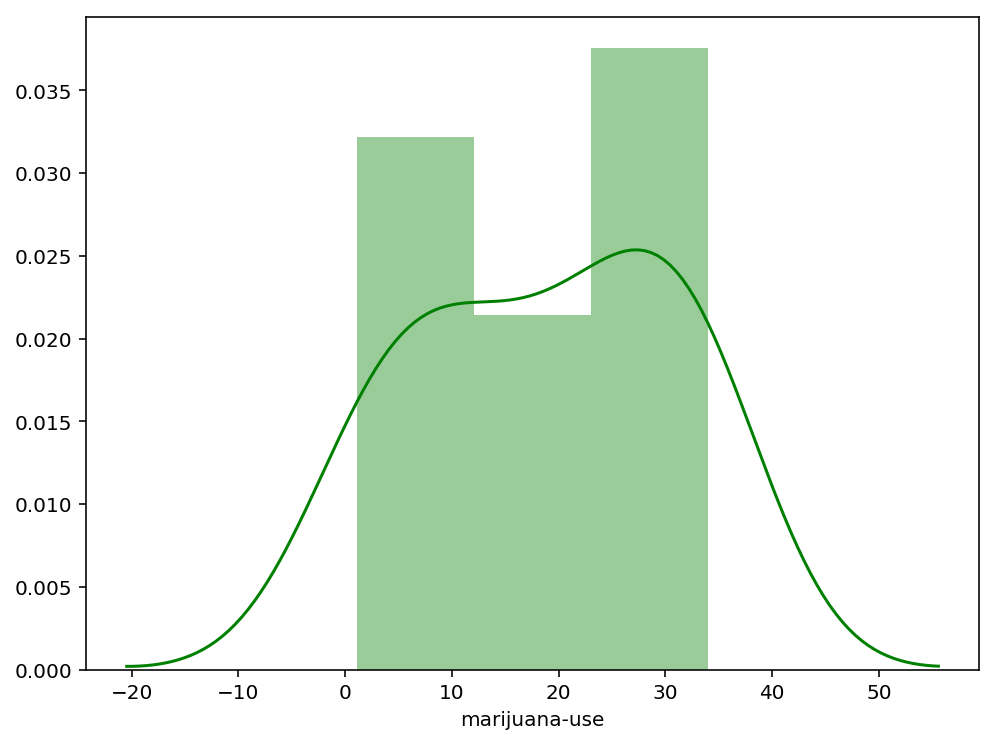

In [36]:
#2.Plot the distribution of a variable of your choice from the drug use dataset.
plt.figure(figsize=(8,6))
sns.distplot(df_drug['marijuana-use'],color='green')

### 

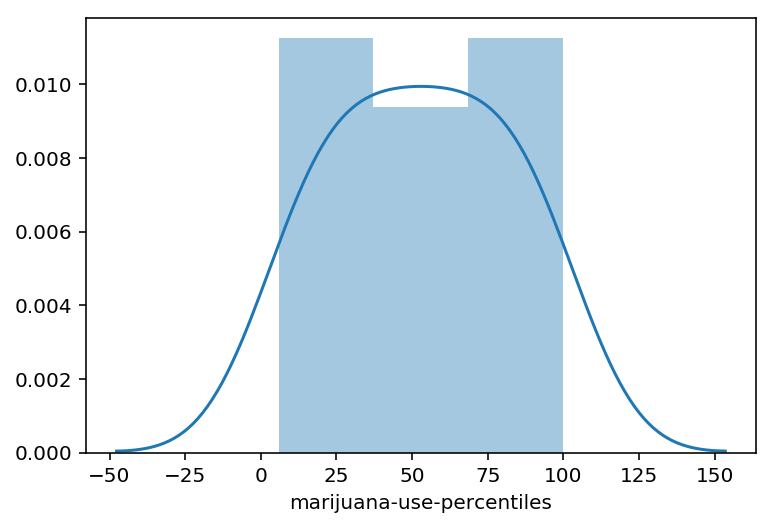

In [37]:
#3.Plot the same variable but percentile scored.

df_drug['marijuana-use-percentiles'] = np.round(df_drug.loc[:, 'marijuana-use'].rank(pct=True)* 100,2)
sns.distplot(df_drug['marijuana-use-percentiles'])

#### the effect, visually, of coverting raw scores to percentile

            Visually the plots of raw data and percentiles of the variable marijuana-use depicts that the  data is normally distributed in case of percentiles.

